# Santos Buoy - Quality Control Analysis

## Import libs

In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest, circmean, skew
# from scipy.stats import circmean

import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import pnboia_qc.pnboia_limits_tests as pnboia_limits_tests
from pnboia_qc.lims_gen import *

import os
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
data_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'
os.chdir(data_path)

In [3]:
# DATA RAW
buoys_df_raw = pd.read_csv('pnboia_raw_data.csv', parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.rename(columns={'humi':'rh', # variables temporarily renamed to match QCChecks limits naming
                            'dewp':'dewpt',
                            'wtmp':'sst',
                            'cvel1':'cspd1',
                            'cvel2':'cspd2',
                            'cvel3':'cspd3',
                            'wvht':'swvht',
                            'wmax':'mxwvht',
                            'dpd':'tp',
                            'mwd':'wvdir',
                            'spred':'wvspread',
                            'arad':'srad'}, inplace=True)
buoys_df_raw.drop(columns=['lat','lon'], inplace=True)

names = {'cf':'cabofrio',
        'cf2':'cabofrio2',
        'fo':'fortaleza',
        'it':'itajai_0',
        'ni':'niteroi',
        'po':'porto_seguro', 
        're':'recife',
        'rg':'rio_grande', 
        'sa':'santos', 
        'vi':'vitoria'}


buoys_df_raw['buoy'] = buoys_df_raw['buoy'].replace(names)
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# Limits from pnboia_limits_tests.py
santos_lims = pnboia_limits_tests.santos

# santos data
santos_raw = buoys_df_raw.loc['santos']


# DATA SITE
buoys_df_site = pd.read_csv('pnboia_site_data.csv', parse_dates=['Datetime'], index_col=['buoy','Datetime'])
buoys_df_site.sort_index(inplace=True)

# Get buoys names
buoys_site = buoys_df_site.reset_index().loc[:,'buoy'].unique()

params_rename = {
                    'Cvel1':'cspd1',
                    'Cvel2':'cspd1',
                    'Cvel3':'cspd1',
                    'Dewp':'dewpt',
                    'Dpd':'tp',
                    'Gust':'gust',
                    'Humi':'rh',
                    'Pres':'pres',
                    'Pressao_Atm':'pres',
                    'Rad_Solar':'arad',
                    'Salinidade':'sss',
                    'Temp_Agua':'sst',
                    'Temp_Ar':'atmp',
                    'Umidade':'rh',
                    'Velocidade_Vento':'wspd',
                    'Wmax':'mxwvht',
                    'Wspd':'wspd1',
                    'Wtmp':'sst',
                    'Wvht':'swvht',
                    'dpd':'tp',
                    'wvht':'swvht',
                    'Direcao_Vento':'wdir',
                    'Wdir':'wdir1',
                    'Atmp':'atmp'
                 }

buoys_df_site.rename(columns=params_rename, inplace=True)

## Preliminary Filtering

- Check range limits for "srad"

In [4]:
# filter data with
santos = filter_data(data=buoys_df_raw,
                    buoy='santos',
                    limits=santos_lims,
                    outlier_check=False,
                    t_continuity_check=False)

santos = santos.where(santos['srad'] > -1000)

santos = santos.drop(columns=santos.filter(regex='dir|head|spread').columns)


mis_value_check done.
range_check done.


## Statistical Analysis

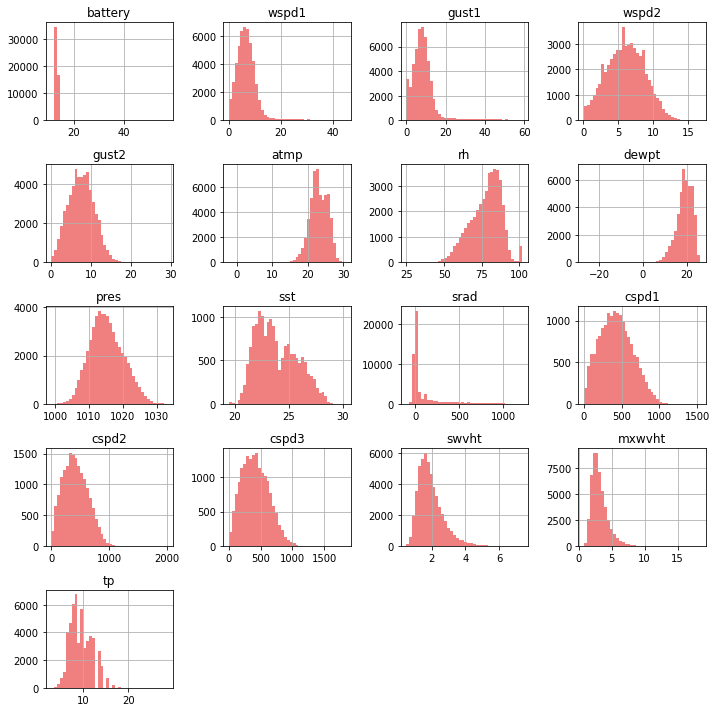

In [17]:
santos.hist(bins=40, color='lightcoral', figsize=(10,10));
plt.tight_layout()

In [20]:
no_outliers = ['pres','wspd2', 'swvht']
few_outliers = ['gust2', 'atmp', 'rh', 'dewpt', 'sst', 'cspd1', 'mxwvht']
many_outliers = ['wspd1', 'gust1', 'srad']

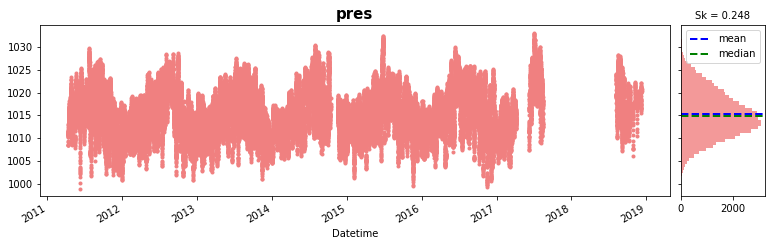

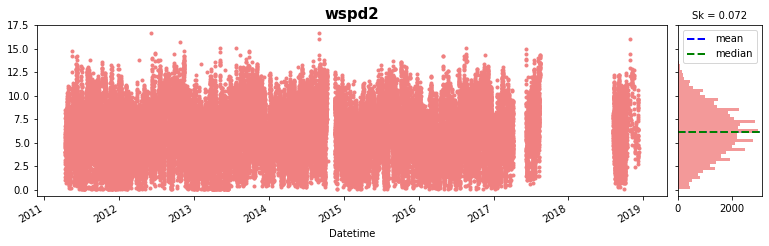

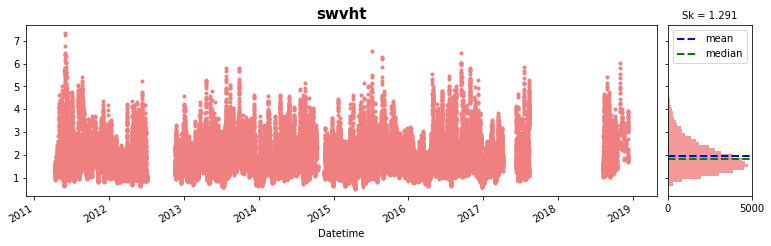

In [21]:
# NO OUTLIERS
for param in no_outliers:
    plot_hist(santos,param)

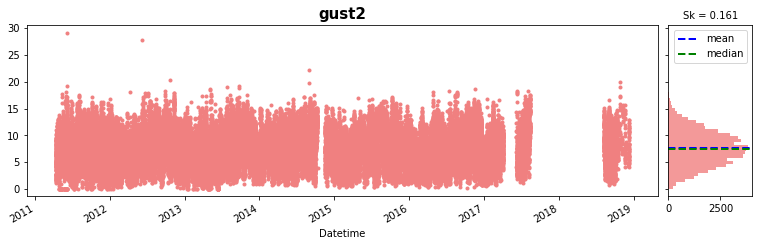

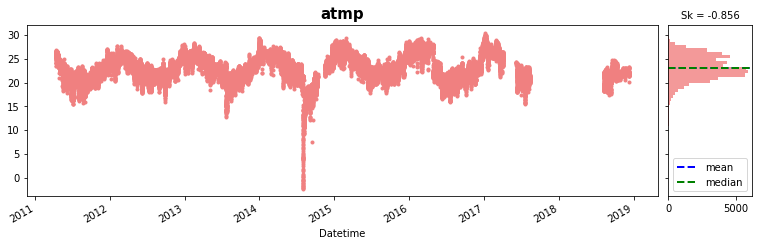

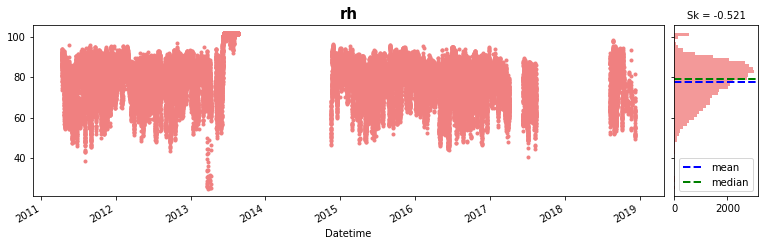

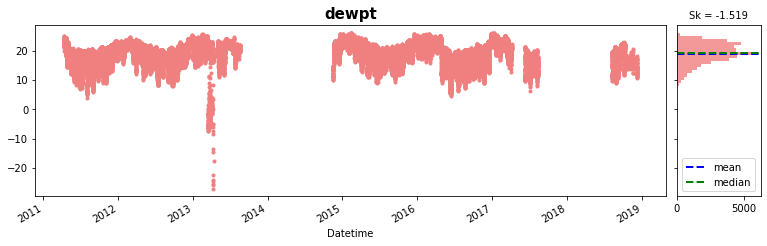

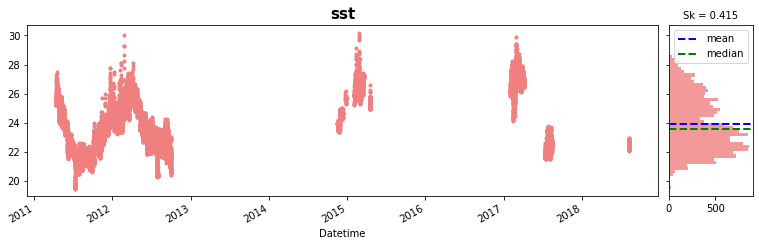

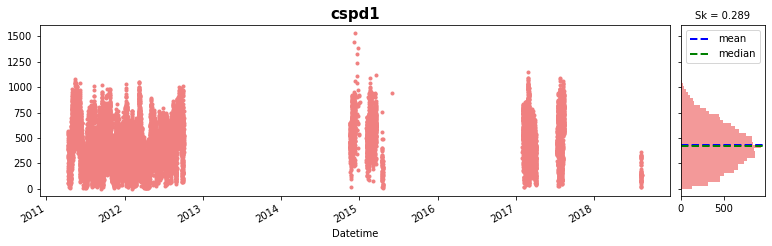

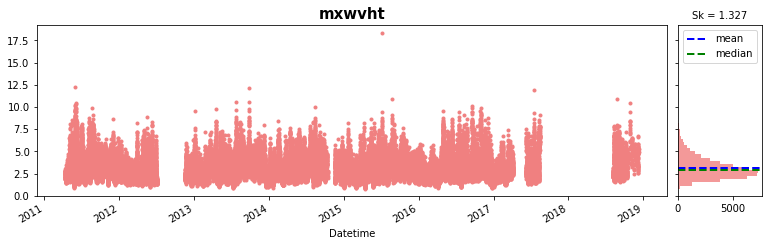

In [22]:
# FEW OUTLIERS
for param in few_outliers:
    plot_hist(santos,param)

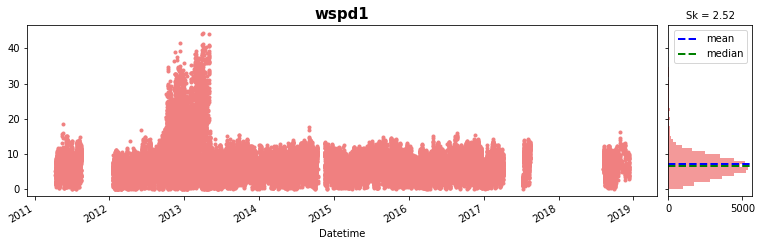

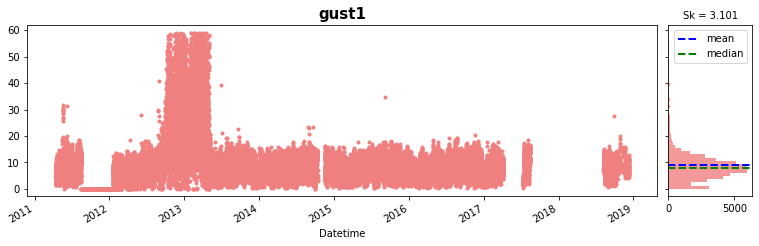

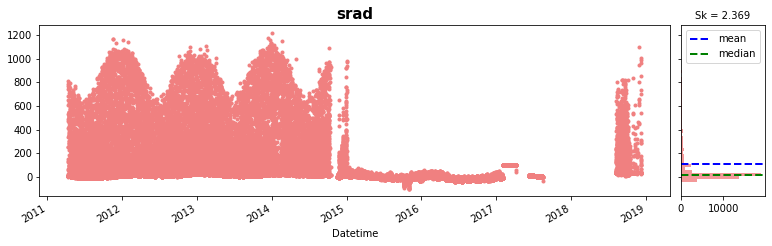

In [23]:
# MANY OUTLIERS
for param in many_outliers:
    plot_hist(santos,param)

## Limits generation and data filtering

In [25]:
# Generated lims
santos_out_lims_df_3 = gen_outlier_lim(santos, buoy_name='santos', std_factor=3).round(1)

# Generate lims dict
santos_out_lims_dict_3 = manual_outlier_lims(santos_out_lims_df_3, buoy_name='santos')

# filter data with
santos3 = filter_data(data=santos,
                    buoy='santos',
                    limits=santos_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=santos_out_lims_dict_3)

outlier_check done.


In [28]:
# Generated lims
santos_out_lims_df_5 = gen_outlier_lim(santos, buoy_name='santos', std_factor=5).round(1)

# Generate lims dict
santos_out_lims_dict_5 = manual_outlier_lims(santos_out_lims_df_5, buoy_name='santos')

# filter data with
santos2 = filter_data(data=santos,
                    buoy='santos',
                    limits=santos_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=santos_out_lims_dict_5)

outlier_check done.


In [37]:
santos_out_lims_df_3

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,7.0,4.4,3.0,13.2,0.0,20.2
gust1,9.2,7.8,3.0,23.4,0.0,32.6
wspd2,6.1,2.7,3.0,8.1,0.0,14.2
gust2,7.6,3.2,3.0,9.5,0.0,17.1
atmp,23.1,2.6,3.0,7.8,15.3,30.9
rh,77.7,10.2,3.0,30.5,47.1,108.2
dewpt,19.0,3.9,3.0,11.6,7.3,30.6
pres,1015.2,5.0,3.0,14.9,1000.4,1030.1
sst,23.9,1.9,3.0,5.7,18.2,29.6


In [38]:
santos_out_lims_df_5

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,7.0,4.4,5.0,22.0,0.0,28.9
gust1,9.2,7.8,5.0,39.1,0.0,48.2
wspd2,6.1,2.7,5.0,13.4,0.0,19.5
gust2,7.6,3.2,5.0,15.9,0.0,23.4
atmp,23.1,2.6,5.0,13.0,10.0,36.1
rh,77.7,10.2,5.0,50.9,26.8,128.5
dewpt,19.0,3.9,5.0,19.4,0.0,38.3
pres,1015.2,5.0,5.0,24.8,990.4,1040.0
sst,23.9,1.9,5.0,9.5,14.4,33.4


# Testing generated limits

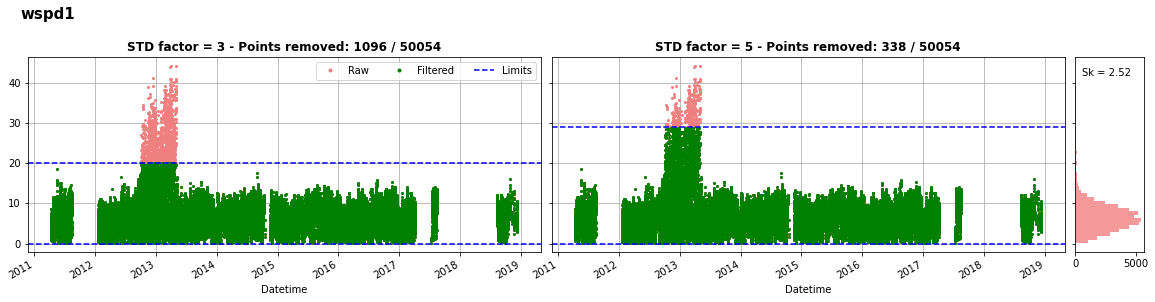

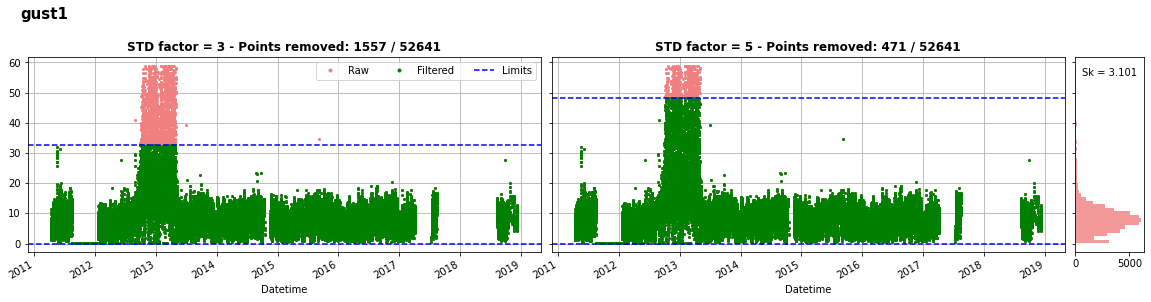

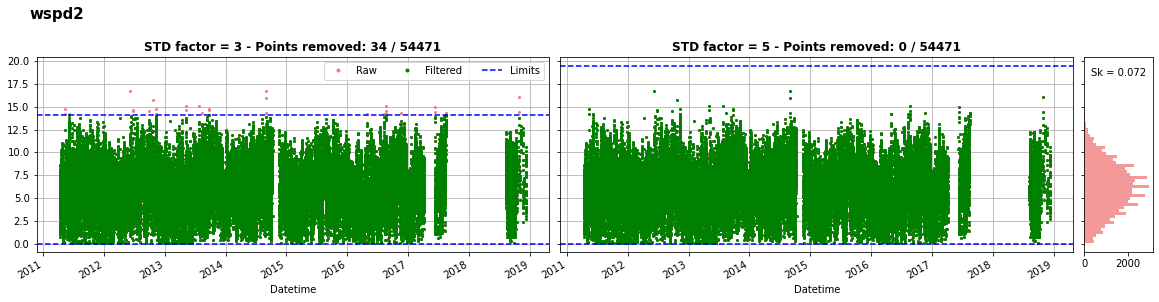

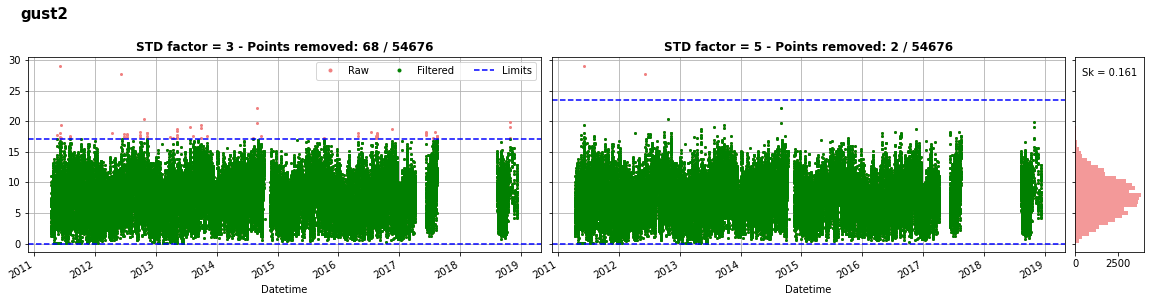

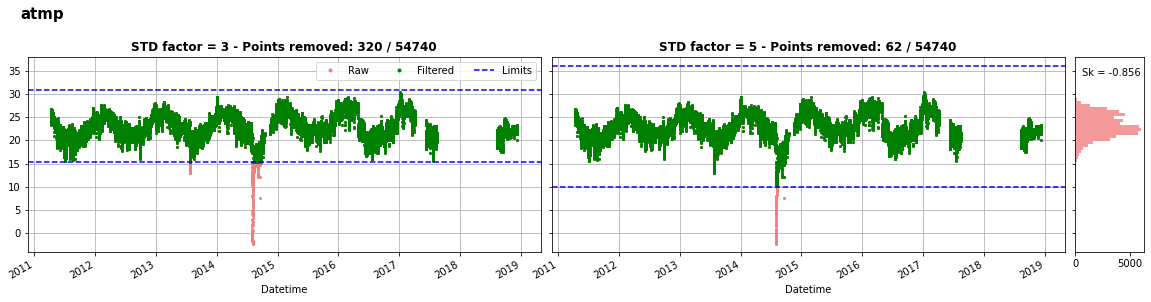

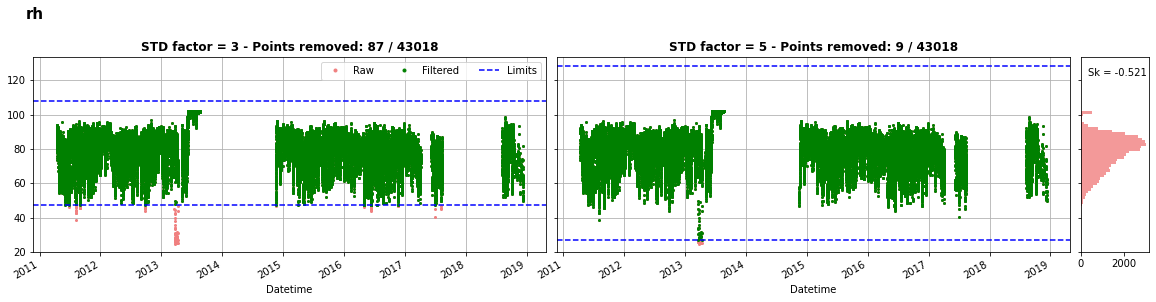

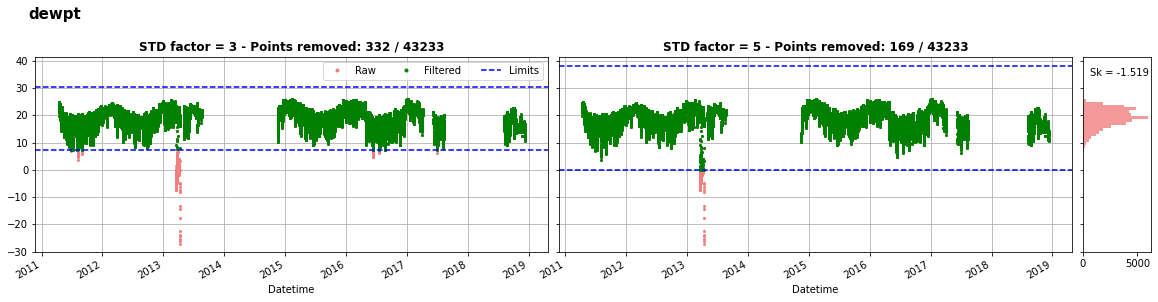

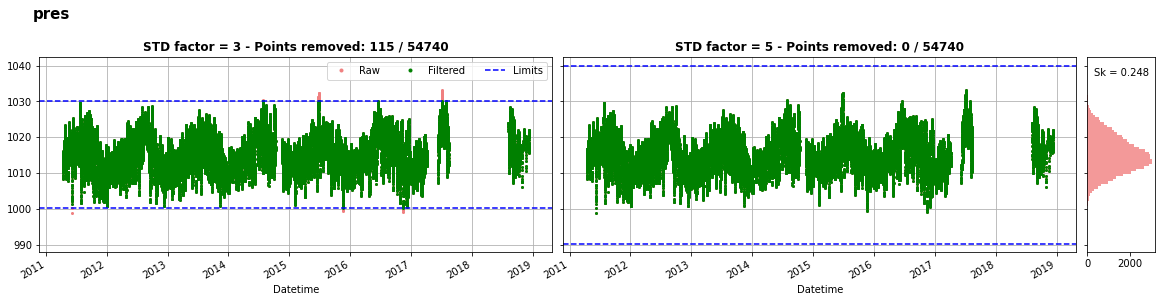

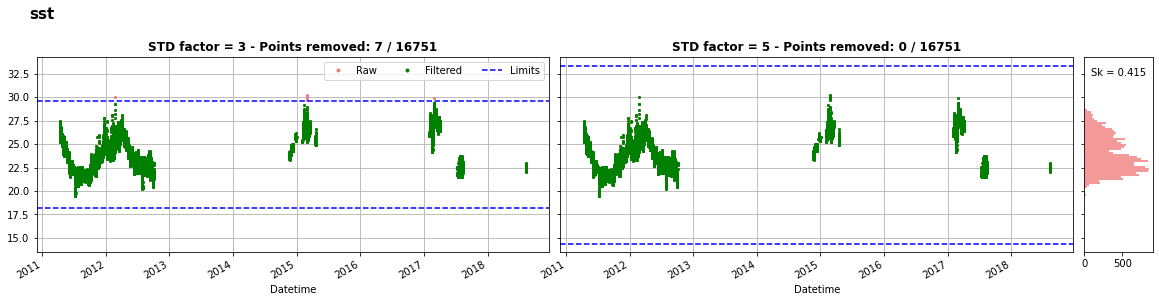

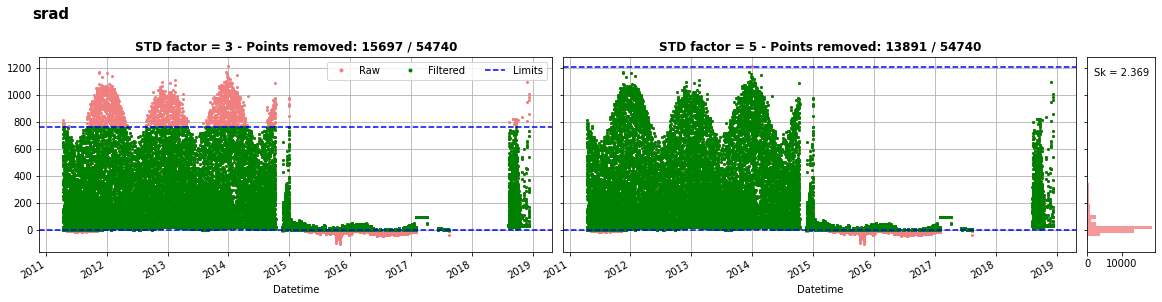

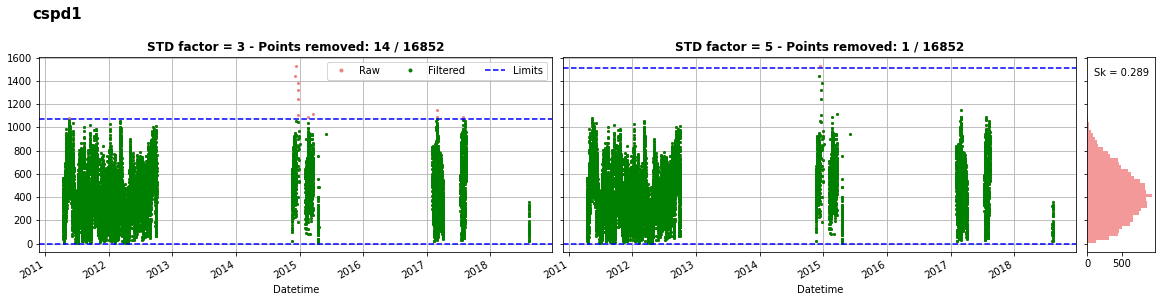

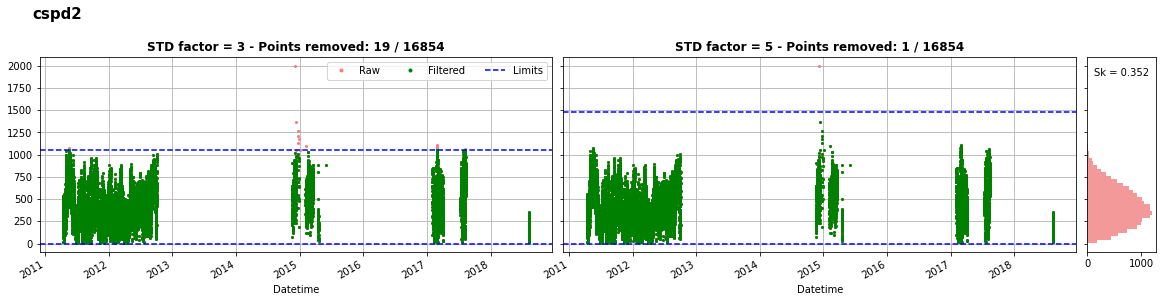

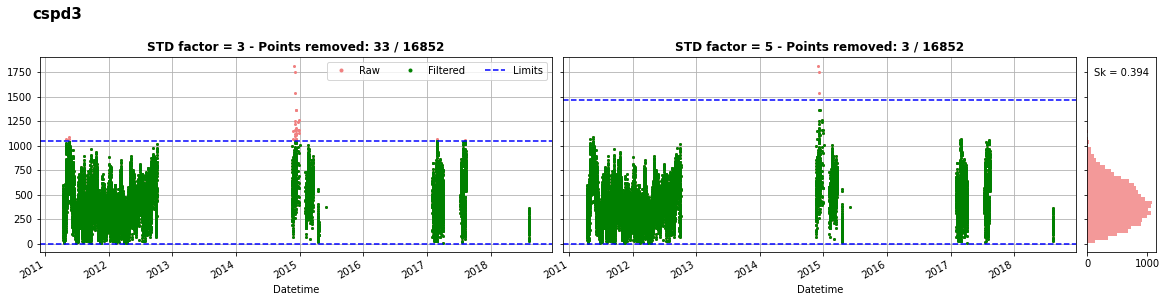

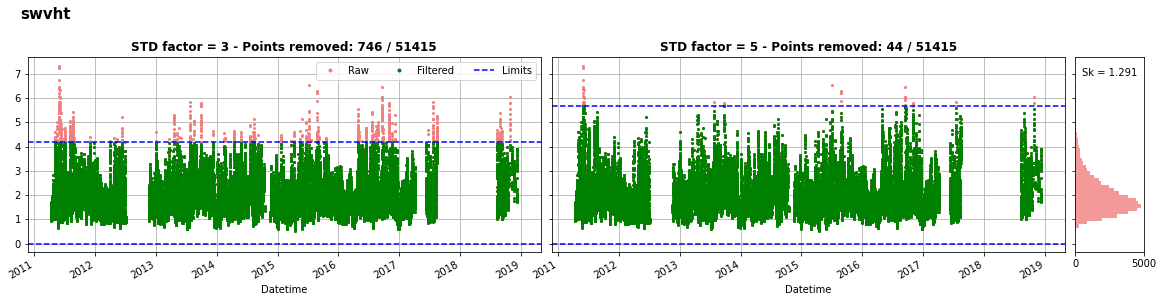

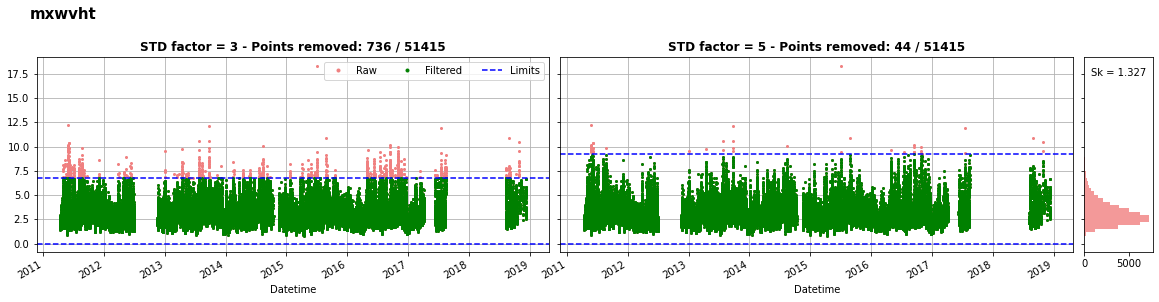

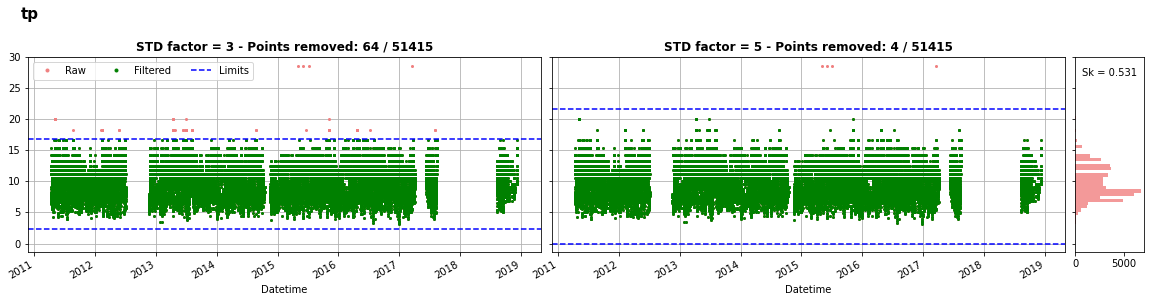

In [32]:
parameters = santos.columns[1:]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=santos,
                    limits=santos_lims,
                    buoy='santos',
                    parameter=param)
    plt.show()

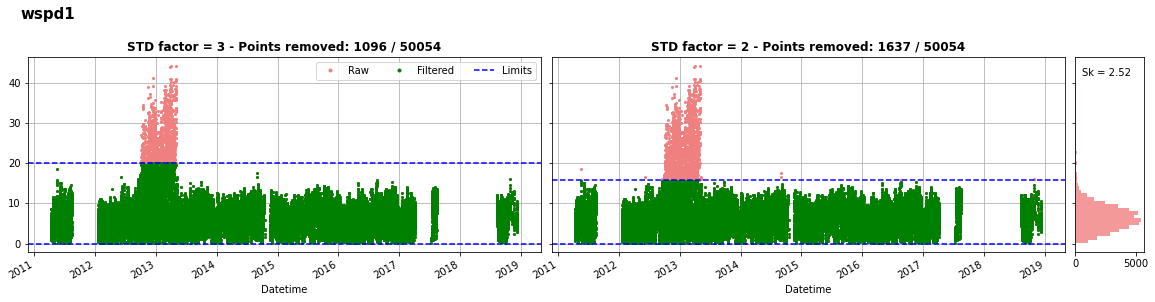

In [33]:
param = 'wspd1'
plot_comparison(factor1=3, 
                    factor2=2, 
                    data=santos,
                    limits=santos_lims,
                    buoy='santos',
                    parameter=param)
plt.show()

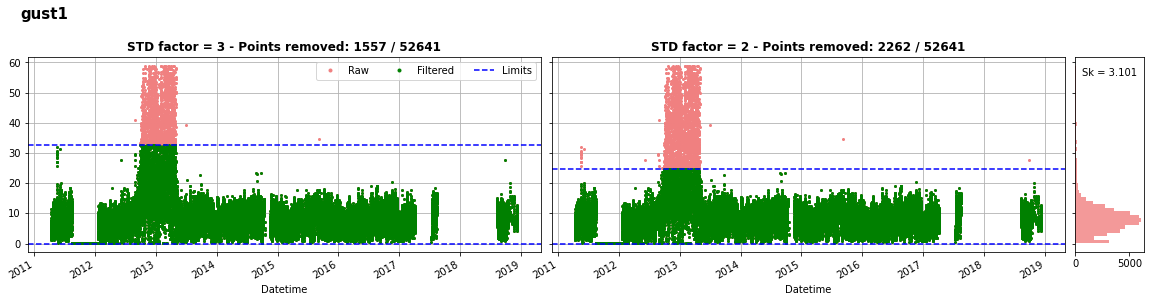

In [34]:
param = 'gust1'
plot_comparison(factor1=3, 
                    factor2=2, 
                    data=santos,
                    limits=santos_lims,
                    buoy='santos',
                    parameter=param)
plt.show()

## Factors determination

Factors are determined based on:
- Natural distribution of the parameter
- Artificial distribution (i.e. shift as a consequence of fail data) of the parameter

In [35]:
factors = {'wspd1': 2,
            'gust1': 2,
            'wspd2': 5,
            'gust2': 5,
            'atmp': 5,
            'rh': 4,
            'dewpt': 4.5,
            'pres': 4,
            'sst': 4,
            'srad': 5,
            'cspd1': 3.5,
            'cspd2': 3.5,
            'cspd3': 3.5,
            'swvht': 8,
            'mxwvht': 8,
            'tp': 5}

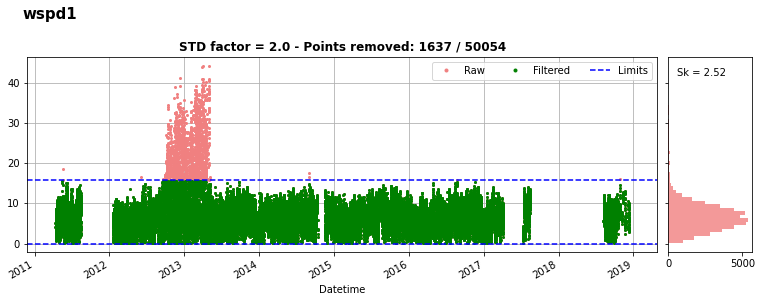

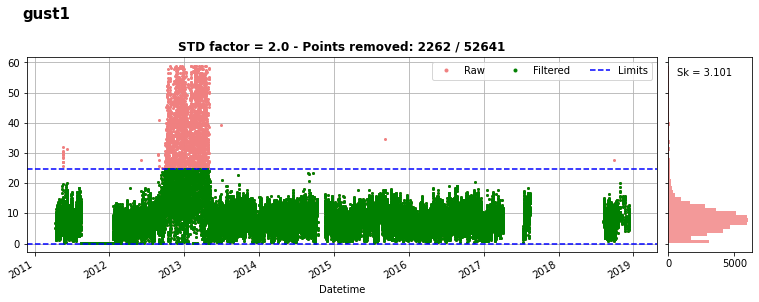

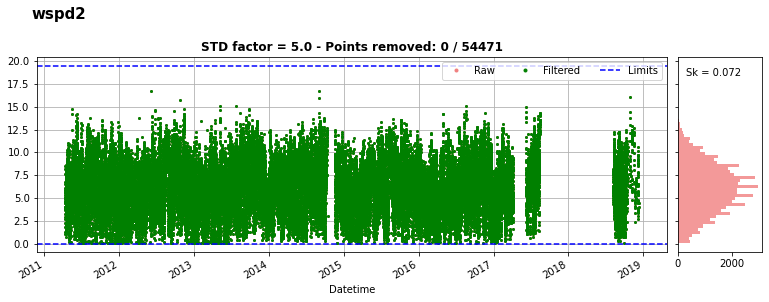

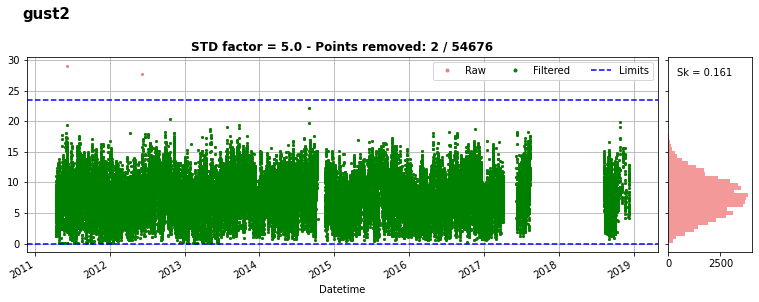

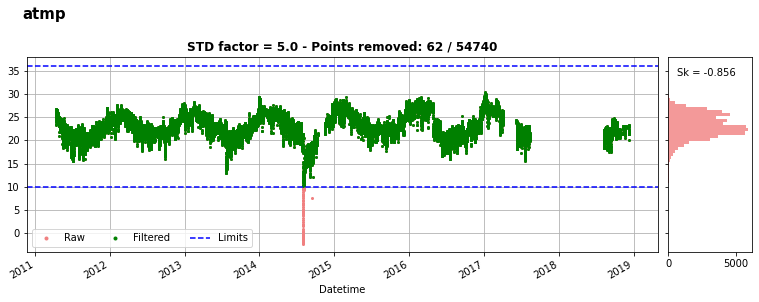

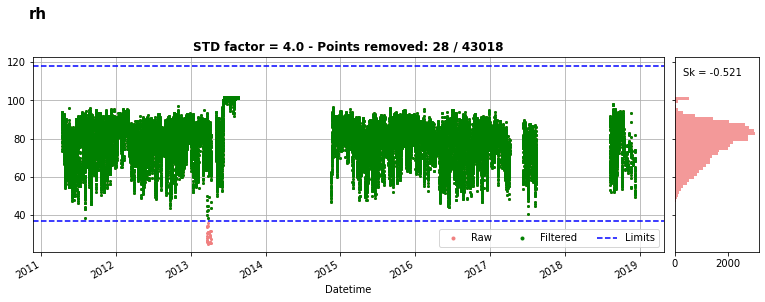

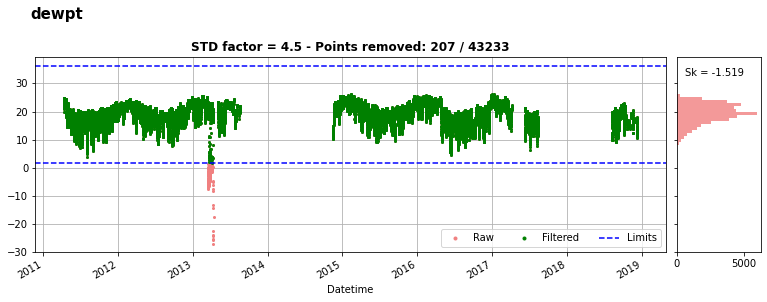

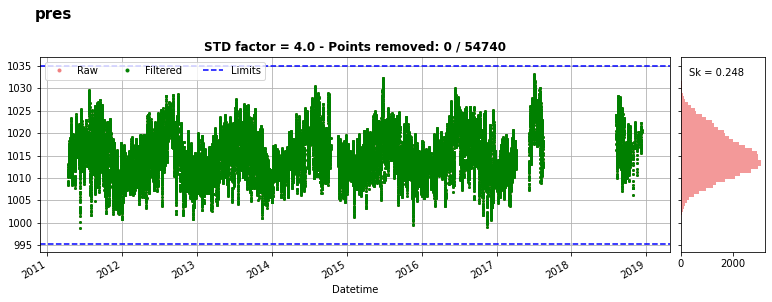

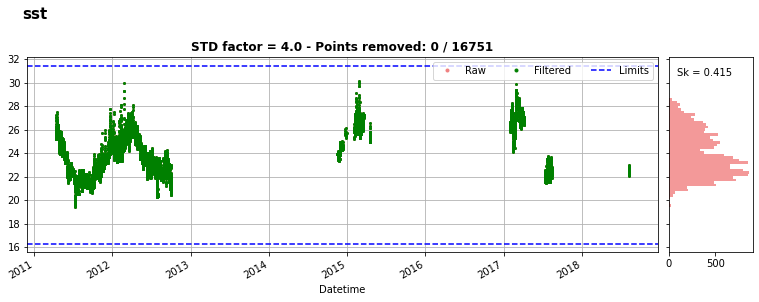

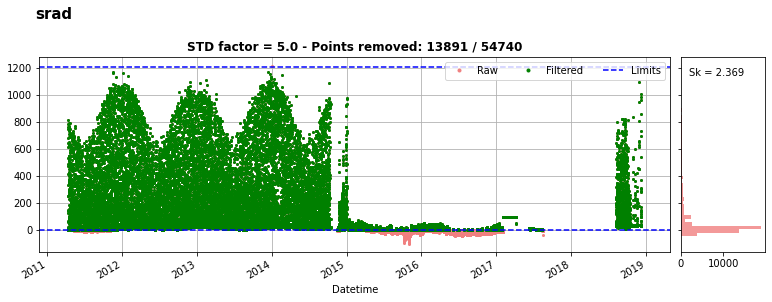

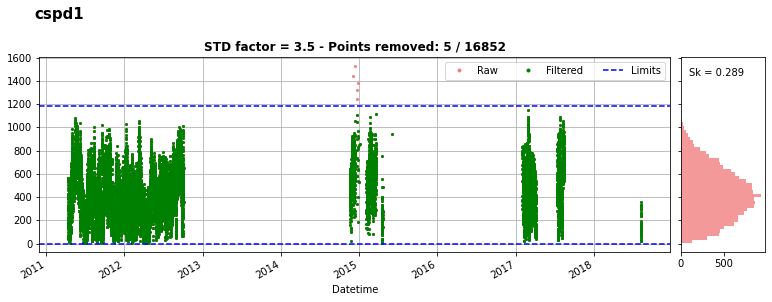

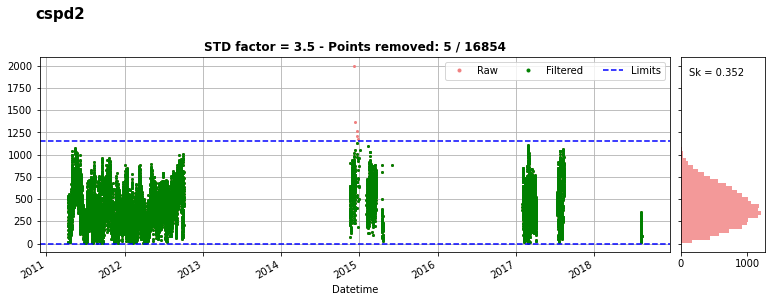

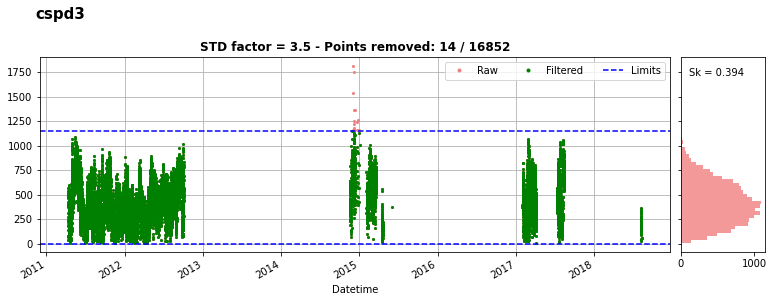

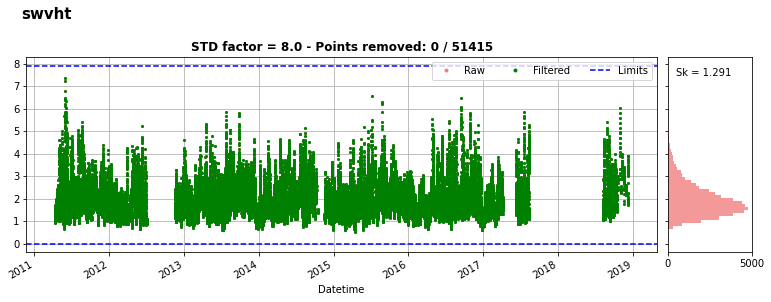

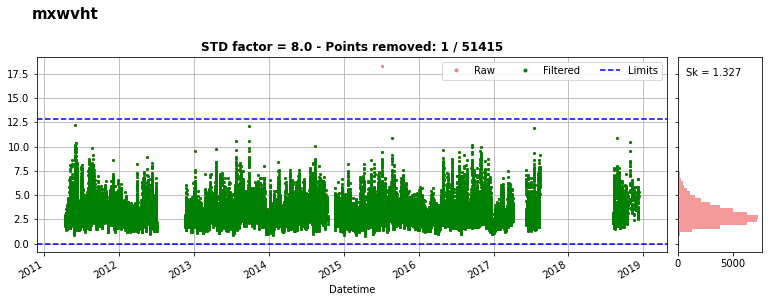

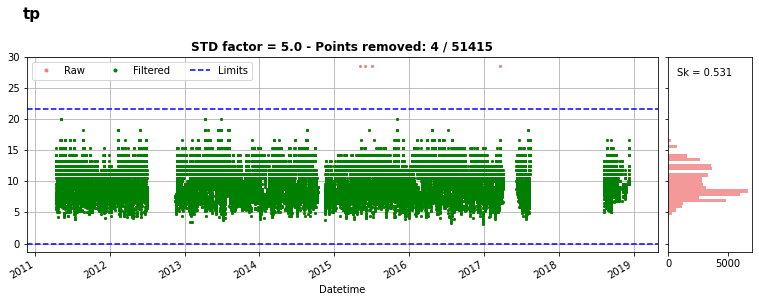

In [41]:
# FILTERING WITH DEFINITIVE FACTORS
santos_notdir = santos.drop(columns=santos.filter(regex='dir|head|spread').columns)
parameters = santos_notdir.columns[1:]

for param in parameters:

    plot_filtering(factor=factors,
                    data=santos,
                    limits=santos_lims,
                    buoy='santos',
                    parameter=param)
    plt.show()

In [42]:
# DATAFRAME WITH DEFINITIVE FACTORS AND OUTLIER LIMITS FOR SANTOS BUOY

factors = {'wspd1': 2,
            'gust1': 2,
            'wspd2': 5,
            'gust2': 5,
            'atmp': 5,
            'rh': 4,
            'dewpt': 4.5,
            'pres': 4,
            'sst': 4,
            'srad': 5,
            'cspd1': 3.5,
            'cspd2': 3.5,
            'cspd3': 3.5,
            'swvht': 8,
            'mxwvht': 8,
            'tp': 5}

santos_out_lims_df = gen_outlier_lim(data=santos,
                                     buoy_name='santos',
                                     std_factor=factors).round(1)

In [43]:
santos_out_lims_df.dropna()

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,7.0,4.4,2.0,8.8,0.0,15.8
gust1,9.2,7.8,2.0,15.6,0.0,24.8
wspd2,6.1,2.7,5.0,13.4,0.0,19.5
gust2,7.6,3.2,5.0,15.9,0.0,23.4
atmp,23.1,2.6,5.0,13.0,10.0,36.1
rh,77.7,10.2,4.0,40.7,37.0,118.3
dewpt,19.0,3.9,4.5,17.4,1.5,36.4
pres,1015.2,5.0,4.0,19.8,995.4,1035.1
sst,23.9,1.9,4.0,7.6,16.3,31.5


In [44]:
# DICTIONARY WITH DEFINITIVE OUTLIER LIMITS FOR SANTOS BUOY
santos_out_lims_dict = manual_outlier_lims(santos_out_lims_df, buoy_name='santos')

In [45]:
santos_out_lims_dict

{'wspd1': [0.0, 15.8],
 'gust1': [0.0, 24.8],
 'wspd2': [0.0, 19.5],
 'gust2': [0.0, 23.4],
 'atmp': [10.0, 36.1],
 'rh': [37.0, 118.3],
 'dewpt': [1.5, 36.4],
 'pres': [995.4, 1035.1],
 'sst': [16.3, 31.5],
 'srad': [0.0, 1204.2],
 'cspd1': [0.0, 1184.1],
 'cspd2': [0.0, 1159.1],
 'cspd3': [0.0, 1154.2],
 'swvht': [0.0, 7.9],
 'mxwvht': [0.0, 12.8],
 'tp': [0.0, 21.5]}

In [46]:
# FILTERED DATA WITH DEFINITIVE OUTLIER LIMITS
santos_definitive = filter_data(data=buoys_df_raw,
                    buoy='santos',
                    limits=santos_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=santos_out_lims_dict)

outlier_check done.


## BMO Santos filtering with Santos limits

### Load data

In [5]:
# bmo santos data
bmosantos_raw = buoys_df_site.loc['bmo_santos'].dropna(how='all', axis=1)
bmosantos_raw.rename(columns={'arad':'srad', 'compass':'bhead'}, inplace=True)
bmosantos_raw.drop(columns=['lat','lon','Battery'], inplace=True)

# Limits from pnboia_limits_tests.py
bmosantos_lims = pnboia_limits_tests.bmo_santos

# preliminary filtering with mis_value check and range_check
bmosantos = filter_data(data=bmosantos_raw,
                    buoy='bmo_santos',
                    limits=bmosantos_lims,
                    mis_value_check=True,
                    range_check=True,
                    outlier_check=False,
                    t_continuity_check=False)

mis_value_check done.
No range_limit for wspd1
No range_limit for wdir1
No range_limit for gust1
No range_limit for wspd2
No range_limit for wdir2
No range_limit for gust2
No range_limit for tp
range_check done.


In [6]:
santos_bmosantos_lims_3 = {'wspd': [0.0, 14.2],
                            'gust': [0.0, 17.1],
                            'wdir': [0.0, 419.1],
                            'atmp': [15.3, 30.9],
                            'rh': [47.1, 108.2],
                            'dewpt': [7.3, 30.6],
                            'pres': [1000.4, 1030.1],
                            'sst': [18.2, 29.6],
                            'bhead': [0.0, 401.5],
                            'srad': [0.0, 766.4],
                            'cspd1': [0.0, 1076.0],
                            'cdir1': [77.1, 367.9],
                            'cspd2': [0.0, 1053.7],
                            'cdir2': [80.5, 365.5],
                            'cspd3': [0.0, 1049.0],
                            'cdir3': [83.1, 364.3],
                            'swvht1': [0.0, 4.2],
                            'mxwvht1': [0.0, 6.8],
                            'tp1': [2.4, 16.8],
                            'wvdir1': [23.5, 284.0],
                            'swvht2': [0.0, 4.2],
                            'tp2': [2.4, 16.8],
                            'wvdir2': [23.5, 284.0]}
                            # 'wvspread': [18.6, 56.9]}


santos_bmosantos_lims_5 = {'wspd': [0.0, 19.5],
                            'gust': [0.0, 23.4],
                            'wdir': [0.0, 604.2],
                            'atmp': [10.0, 36.1],
                            'rh': [26.8, 128.5],
                            'dewpt': [0.0, 38.3],
                            'pres': [990.4, 1040.0],
                            'sst': [14.4, 33.4],
                            'bhead': [0.0, 572.3],
                            'srad': [0.0, 1204.2],
                            'cspd1': [0.0, 1508.3],
                            'cdir1': [0.0, 464.8],
                            'cspd2': [0.0, 1475.3],
                            'cdir2': [0.0, 460.5],
                            'cspd3': [0.0, 1469.7],
                            'cdir3': [0.0, 458.1],
                            'swvht1': [0.0, 5.7],
                            'mxwvht1': [0.0, 9.2],
                            'tp1': [0.0, 21.5],
                            'wvdir1': [0.0, 370.8],
                            'swvht2': [0.0, 5.7],
                            'tp2': [0.0, 21.5],
                            'wvdir2': [0.0, 370.8]}
                            # 'wvspread': [5.8, 69.7]}

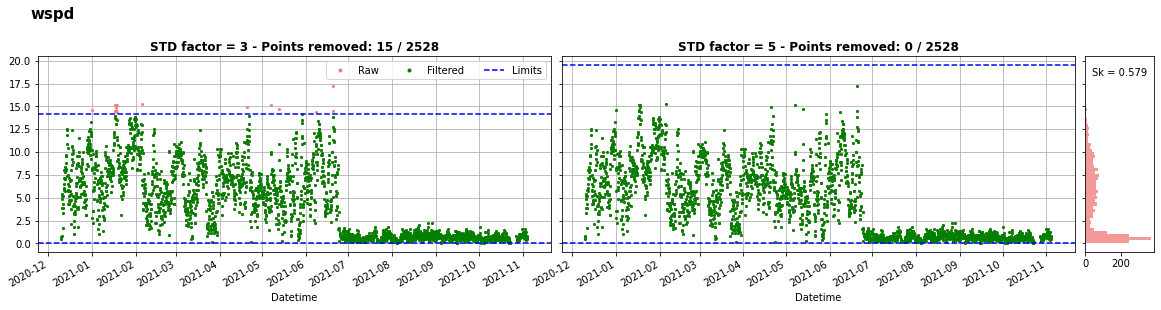

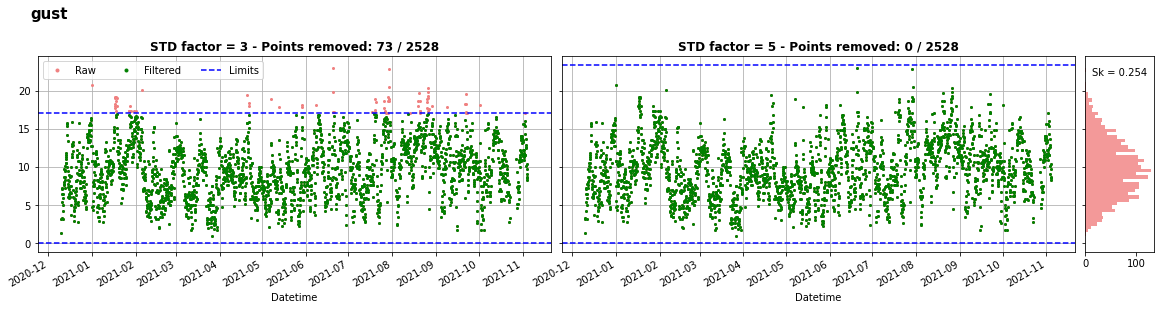

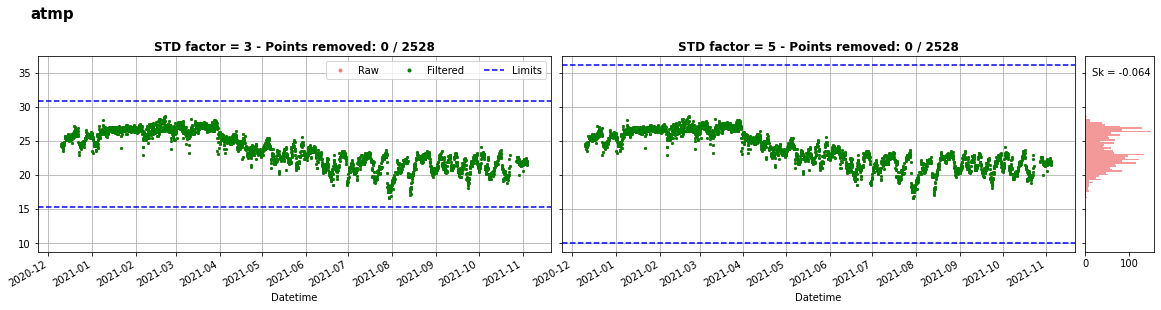

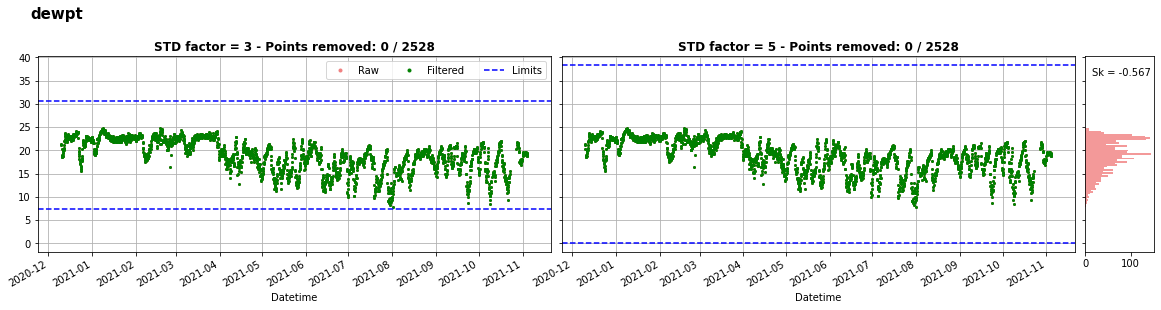

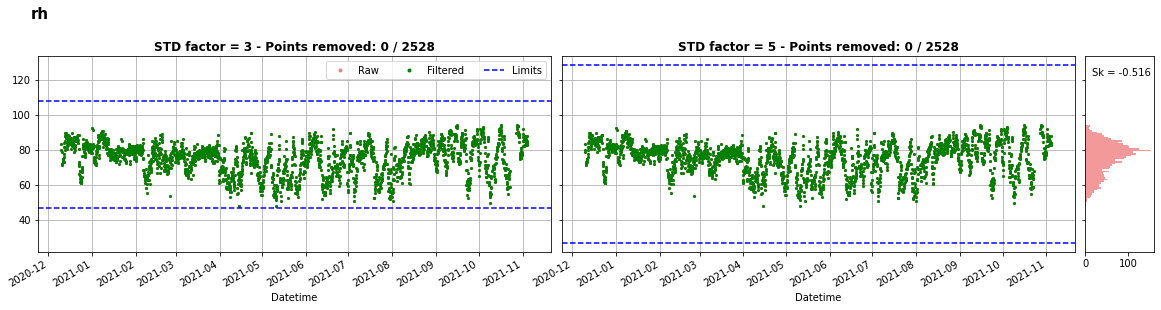

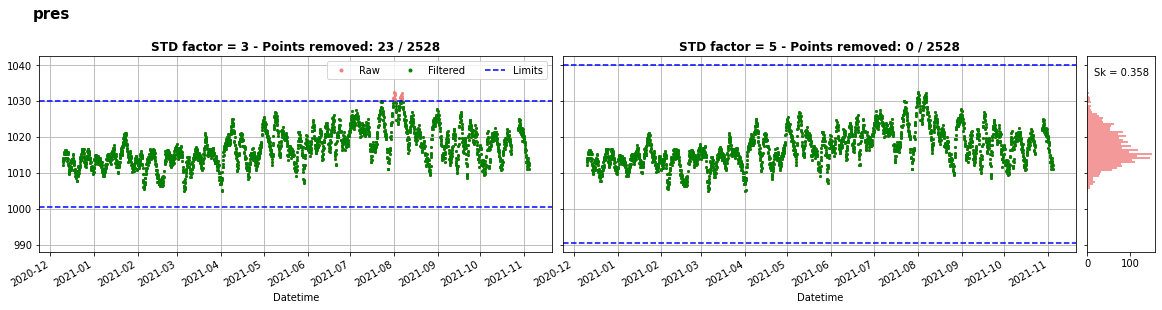

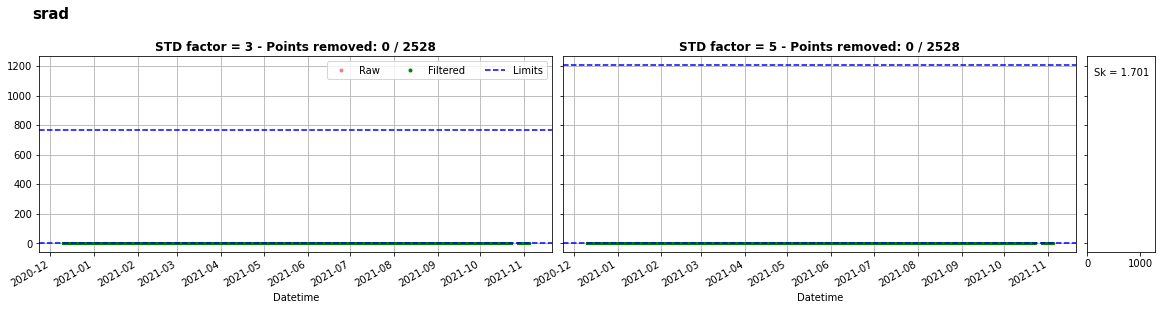

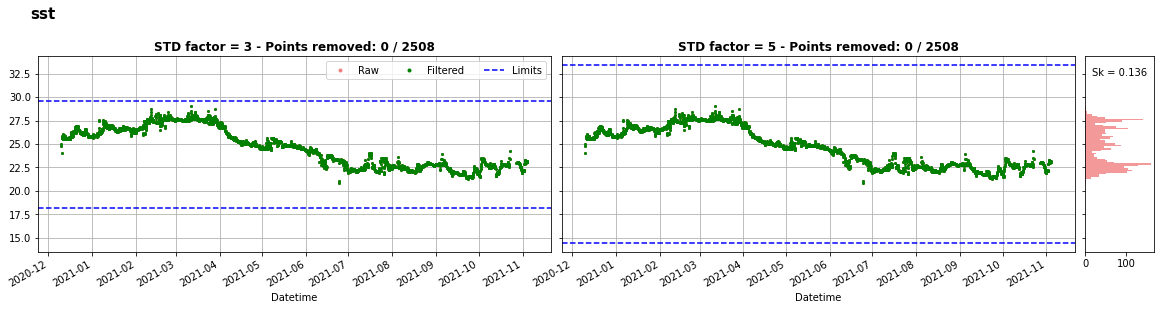

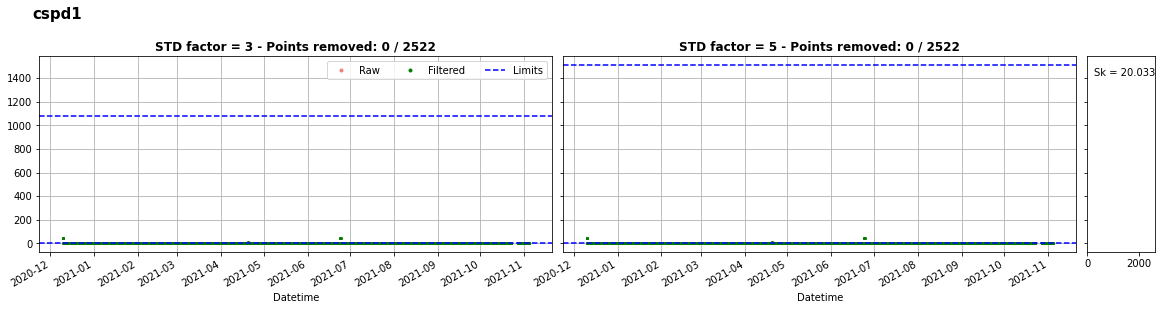

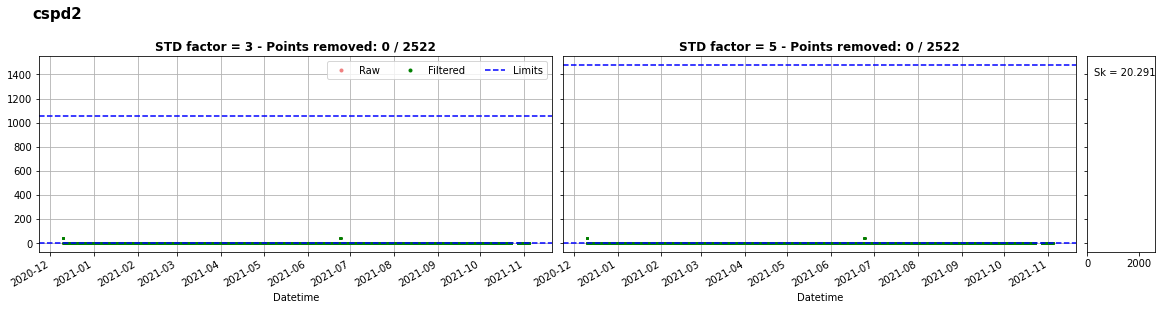

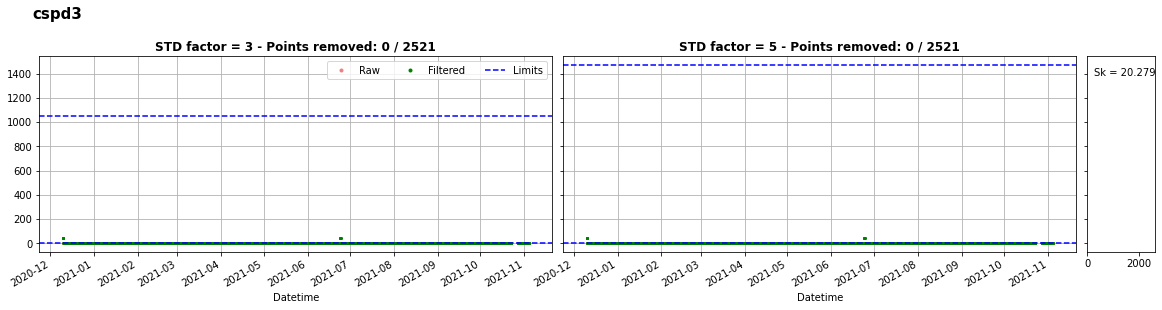

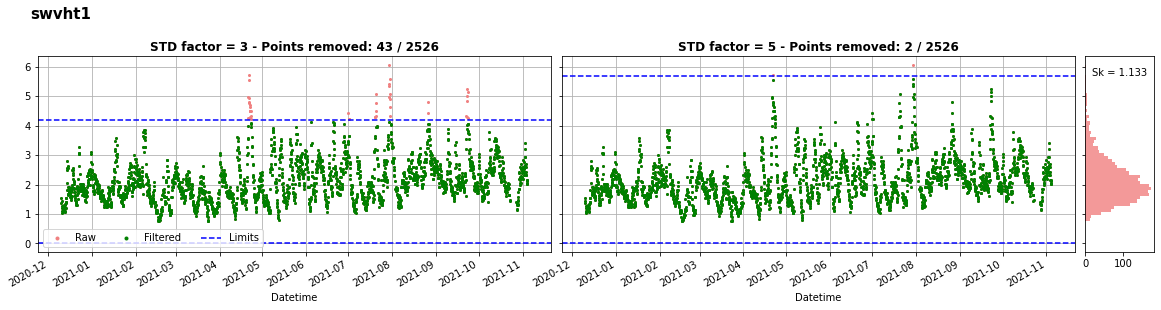

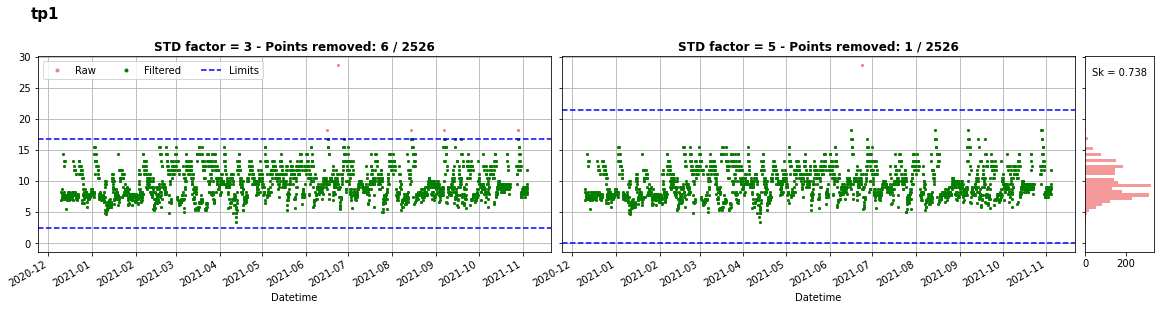

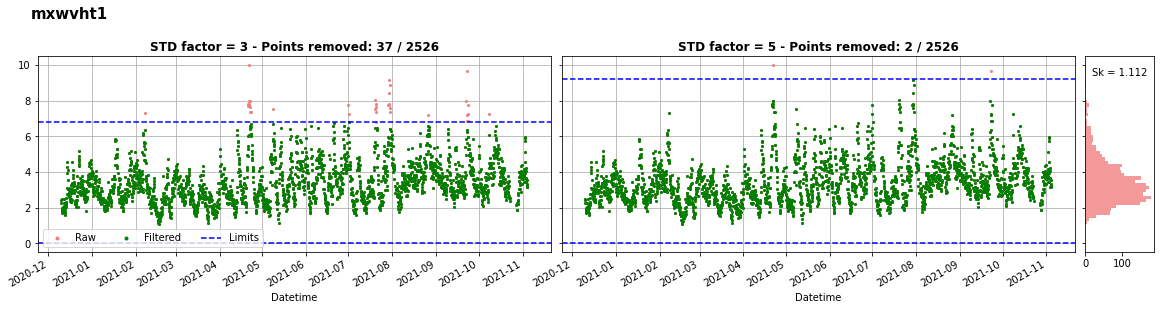

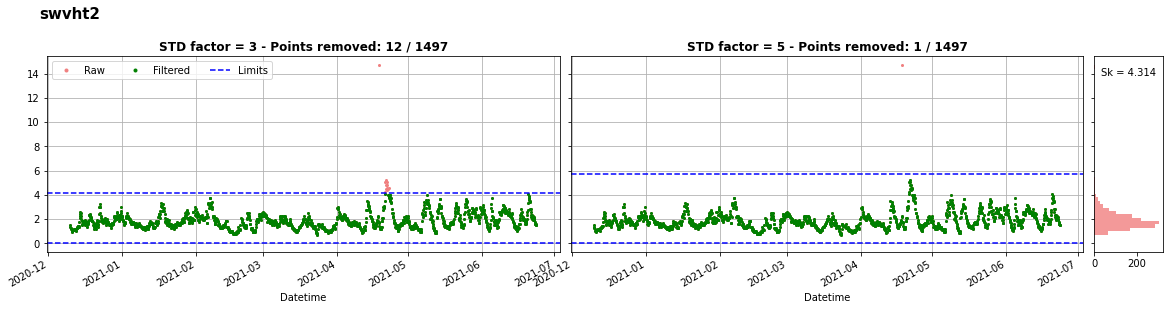

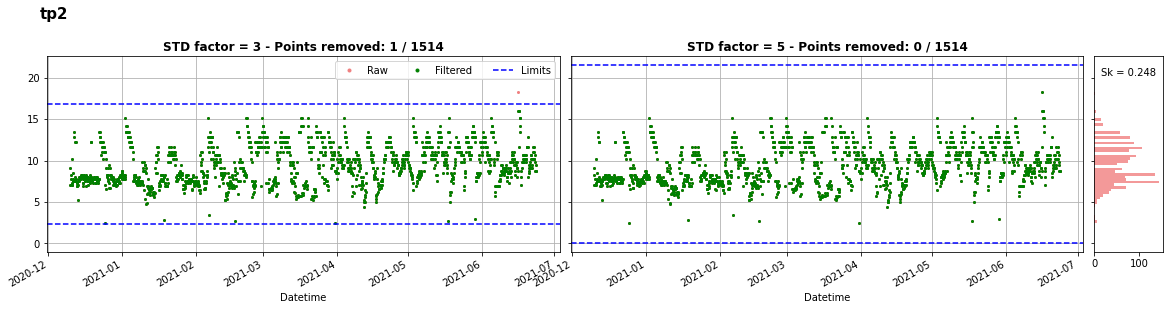

In [49]:
bmosantos_notdir = bmosantos.drop(columns=bmosantos.filter(regex='dir|head|spread').columns)

manual_limits = [santos_bmosantos_lims_3, santos_bmosantos_lims_5]

for param in bmosantos_notdir:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=bmosantos,
                    limits=bmosantos_lims,
                    manual_limits=manual_limits,
                    buoy='bmo_santos',
                    parameter=param)
    plt.show()

## Factors determination

Factors are determined based on:
- Natural distribution of the parameter
- Artificial distribution (i.e. shift as a consequence of fail data) of the parameter

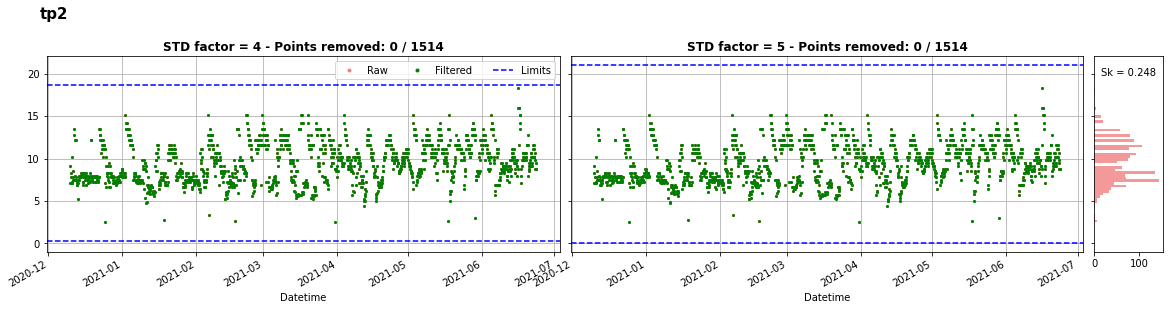

In [28]:
param = 'tp2'
plot_comparison(factor1=4, 
                    factor2=5, 
                    data=bmosantos,
                    limits=bmosantos_lims,
                    buoy='bmo_santos',
                    parameter=param)
plt.show()

In [29]:
factors = {
    'wspd': 4,
    'gust': 4,
    'atmp': 4,
    'rh': 4,
    'dewpt': 4,
    'pres': 4,
    'sst': 3,
    'srad': 5,
    'cspd1': 1,
    'cspd2': 1,
    'cspd3': 1,
    'swvht1': 7,
    'mxwvht1': 7,
    'tp1': 5,
    'swvht2': 7,
    'tp2': 5,
    }

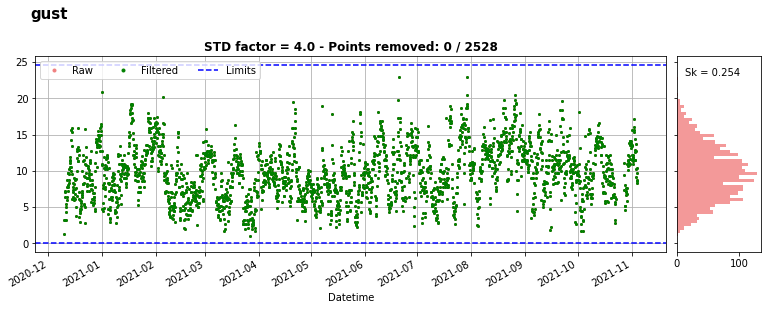

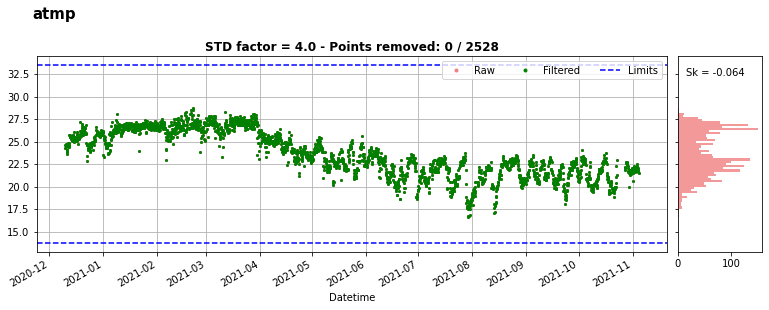

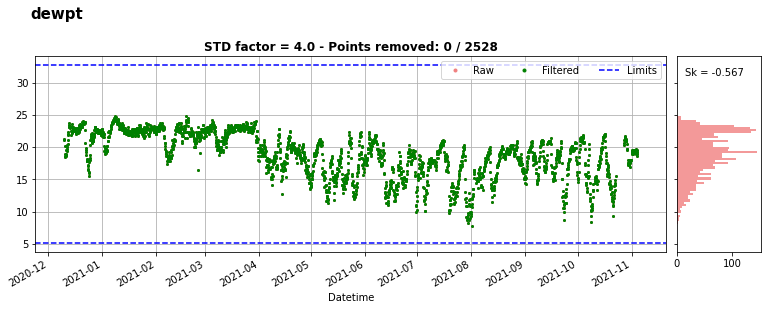

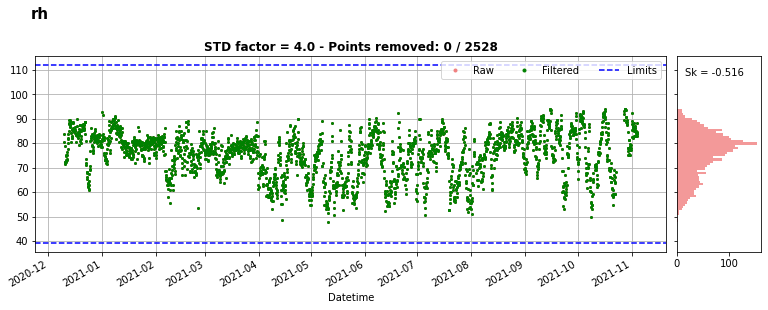

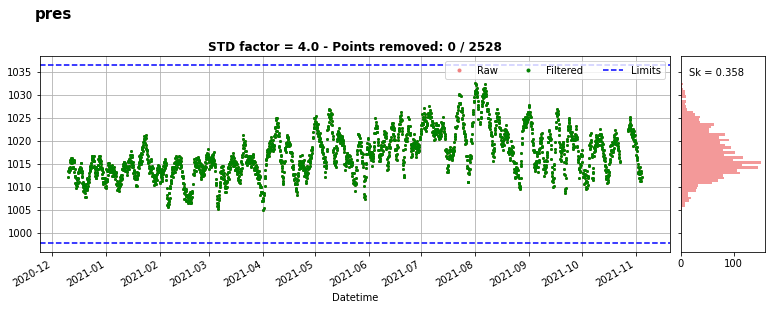

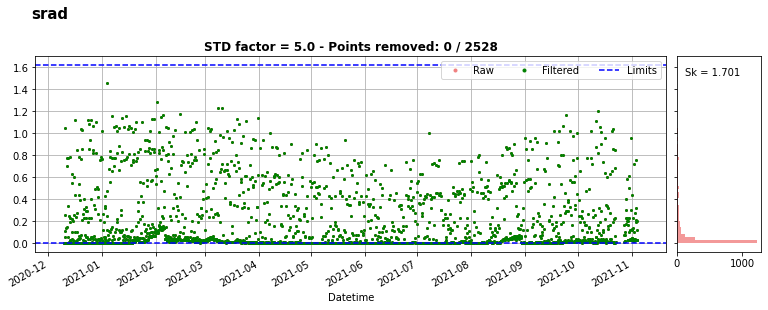

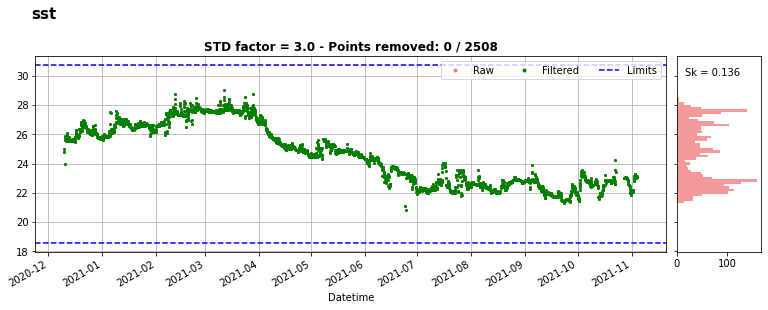

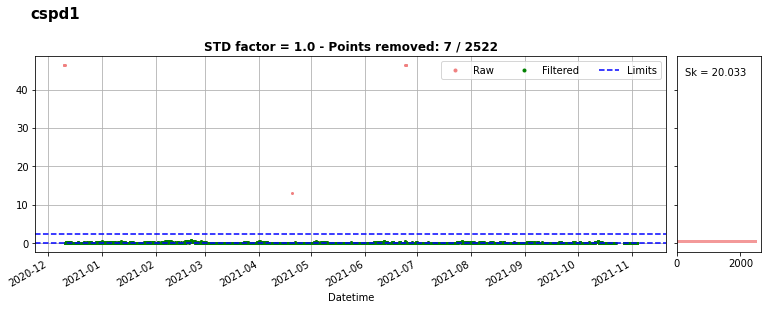

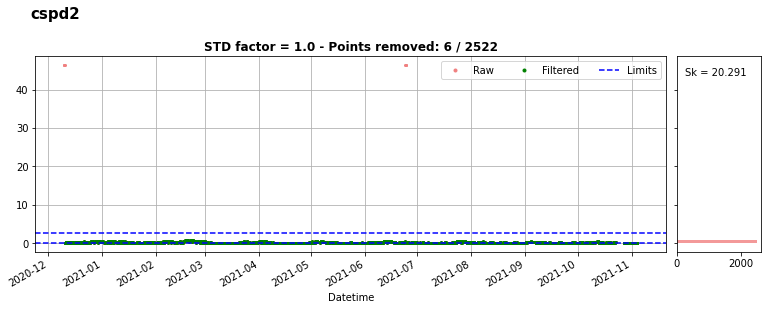

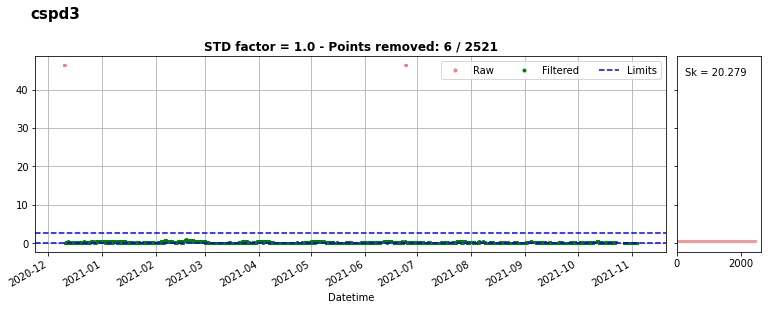

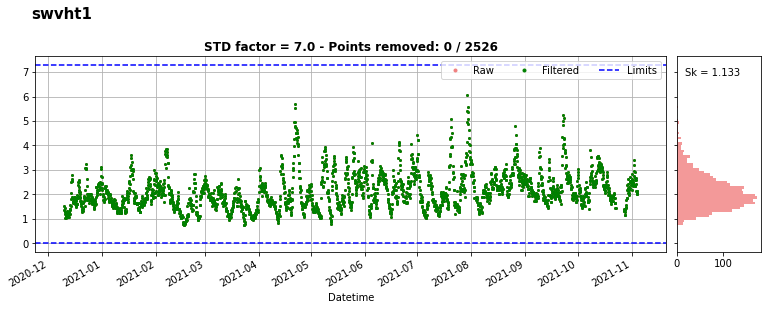

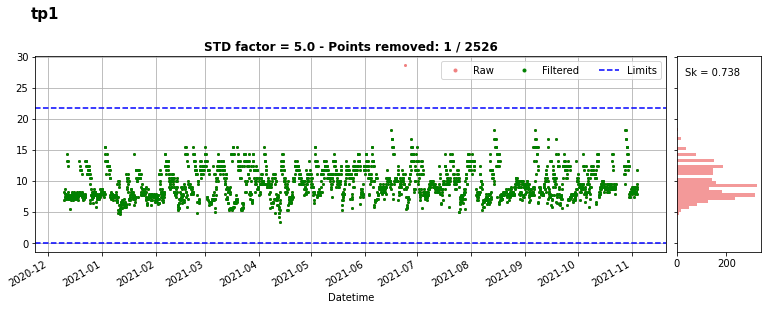

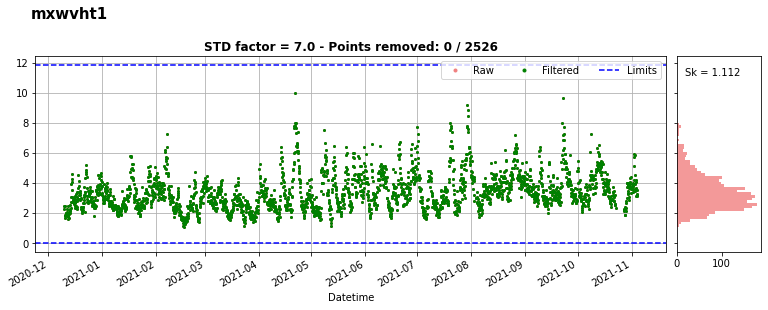

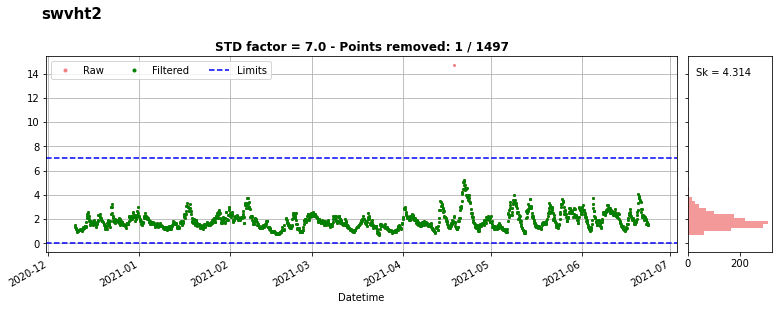

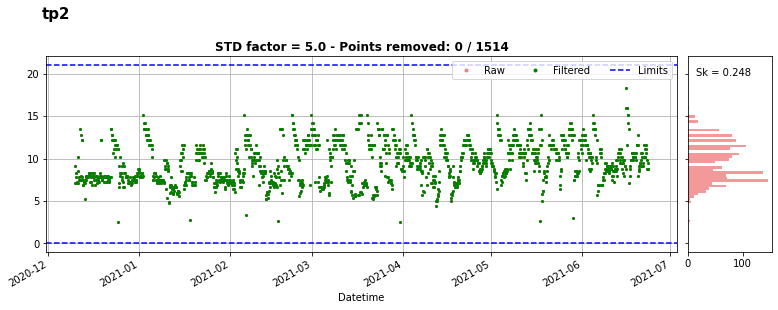

In [30]:
# FILTERING WITH DEFINITIVE FACTORS
bmosantos_notdir = bmosantos.drop(columns=bmosantos.filter(regex='dir|head|spread').columns)
parameters = bmosantos_notdir.columns[1:]

for param in parameters:

    plot_filtering(factor=factors,
                    data=bmosantos,
                    limits=bmosantos_lims,
                    buoy='bmo_santos',
                    parameter=param)
    plt.show()

In [38]:
# DATAFRAME WITH DEFINITIVE FACTORS AND OUTLIER LIMITS

factors = {
    'wspd': 4,
    'gust': 4,
    'atmp': 4,
    'rh': 4,
    'dewpt': 4,
    'pres': 4,
    'sst': 3,
    'srad': 5,
    'cspd1': 1,
    'cspd2': 1,
    'cspd3': 1,
    'swvht1': 7,
    'mxwvht1': 7,
    'tp1': 5,
    'swvht2': 7,
    'tp2': 5,
    }
    
bmosantos_out_lims_df = gen_outlier_lim(data=bmosantos,
                                     buoy_name='bmo_santos',
                                     std_factor=factors).round(1).dropna()

In [39]:
bmosantos_out_lims_df

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd,4.4,3.8,4.0,15.3,0.0,19.7
gust,9.7,3.7,4.0,14.8,0.0,24.6
atmp,23.6,2.5,4.0,9.9,13.7,33.5
dewpt,18.9,3.5,4.0,13.8,5.1,32.7
rh,75.5,9.1,4.0,36.4,39.0,111.9
pres,1017.1,4.9,4.0,19.4,997.6,1036.5
srad,0.2,0.3,5.0,1.4,0.0,1.6
sst,24.6,2.0,3.0,6.1,18.5,30.7
cspd1,0.3,2.3,1.0,2.3,0.0,2.5


In [40]:
# DICTIONARY WITH DEFINITIVE OUTLIER LIMITS
bmosantos_out_lims_dict = manual_outlier_lims(bmosantos_out_lims_df, buoy_name='bmo_santos')

In [41]:
bmosantos_out_lims_dict

{'wspd': [0.0, 19.7],
 'gust': [0.0, 24.6],
 'atmp': [13.7, 33.5],
 'dewpt': [5.1, 32.7],
 'rh': [39.0, 111.9],
 'pres': [997.6, 1036.5],
 'srad': [0.0, 1.6],
 'sst': [18.5, 30.7],
 'cspd1': [0.0, 2.5],
 'cspd2': [0.0, 2.6],
 'cspd3': [0.0, 2.6],
 'swvht1': [0.0, 7.3],
 'tp1': [0.0, 21.8],
 'mxwvht1': [0.0, 11.8],
 'swvht2': [0.0, 7.1],
 'tp2': [0.0, 21.0]}

## Cabofrio filtering with Santos limits

In [50]:
# cabofrio data
cabofrio_raw = buoys_df_raw.loc['cabofrio']

# Limits from pnboia_limits_tests.py
cabofrio_lims = pnboia_limits_tests.cabofrio

# filter data with
cabofrio = filter_data(data=buoys_df_raw,
                    buoy='cabofrio',
                    limits=cabofrio_lims,
                    mis_value_check=True,
                    range_check=True,
                    outlier_check=False,
                    t_continuity_check=False)

mis_value_check done.
range_check done.


In [51]:
# filter data with
cabofrio5 = filter_data(data=buoys_df_raw,
                    buoy='cabofrio',
                    limits=cabofrio_lims,
                    mis_value_check=True,
                    range_check=True,
                    t_continuity_check=False,
                    outlier_limits=santos_out_lims_dict_5)

mis_value_check done.
range_check done.
outlier_check done.


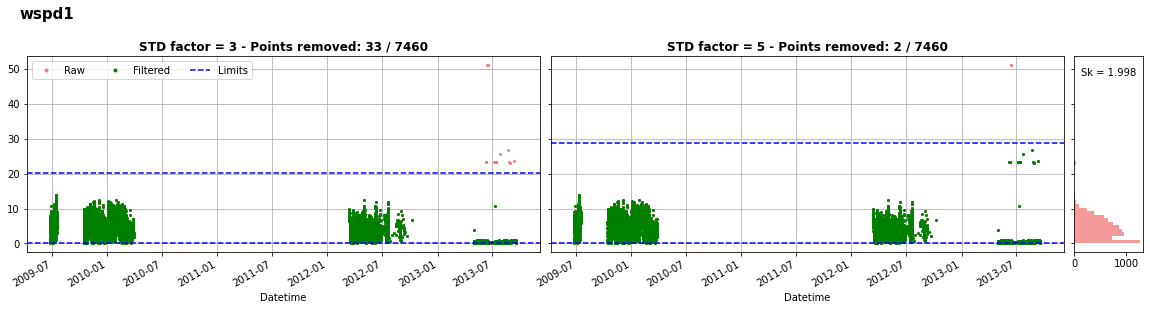

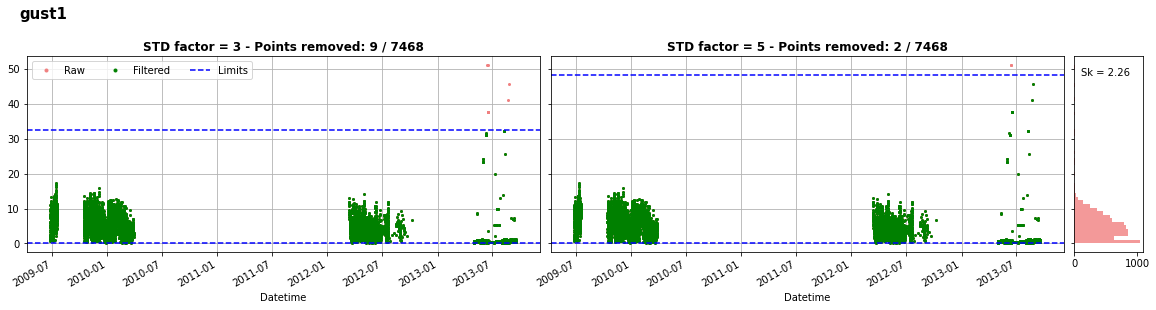

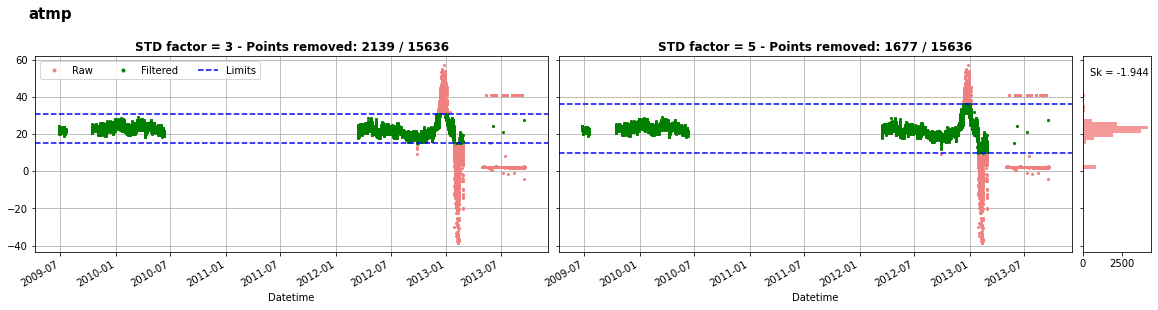

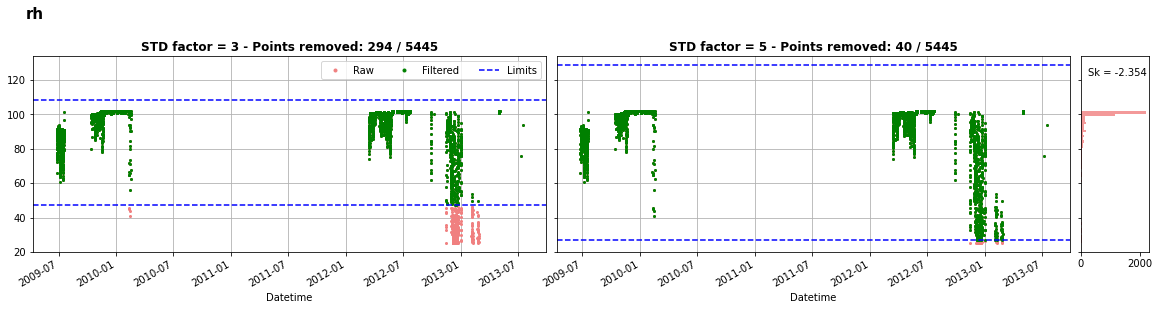

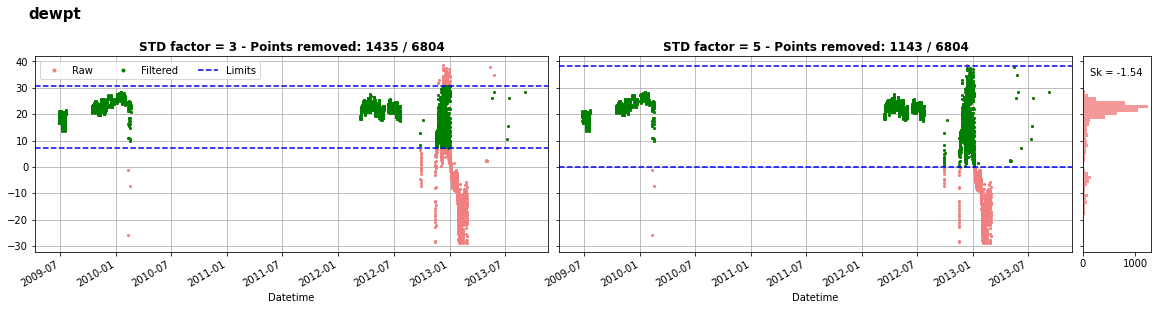

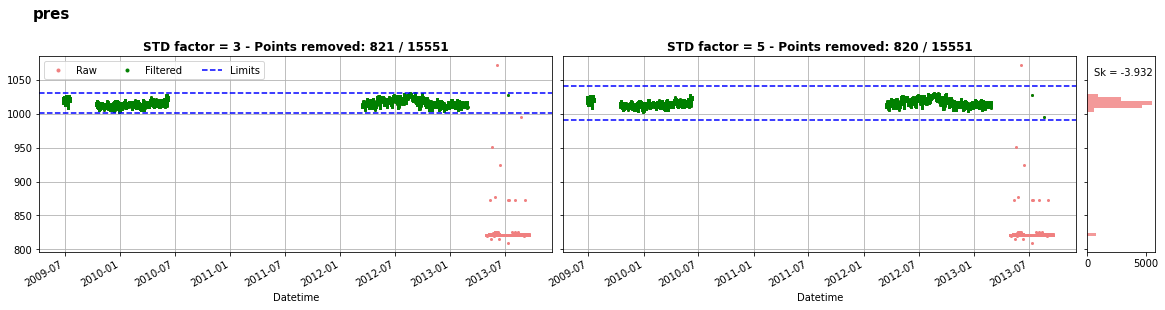

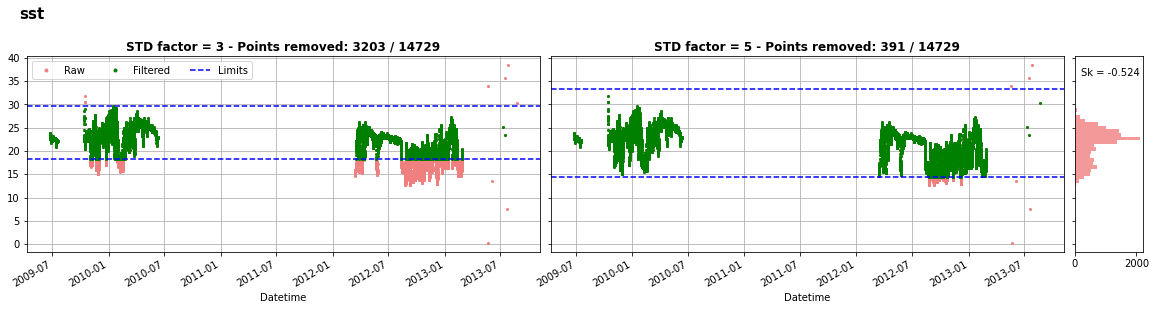

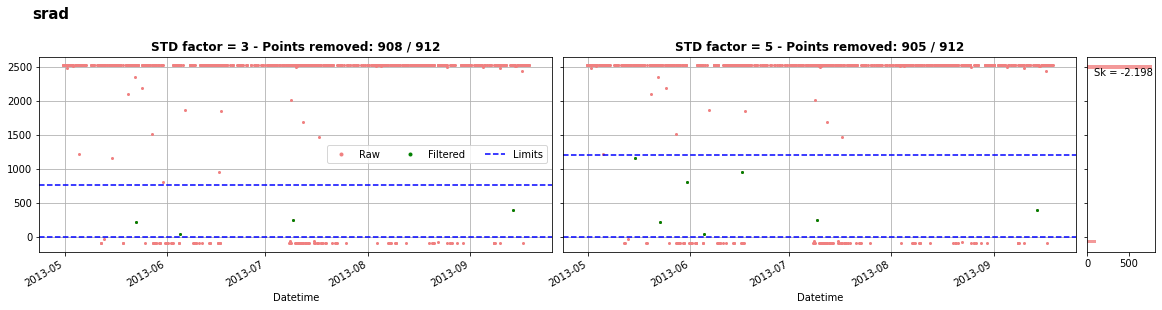

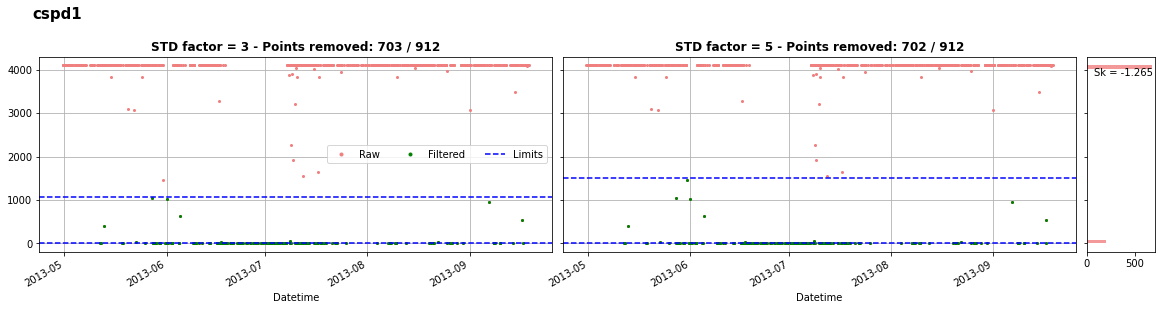

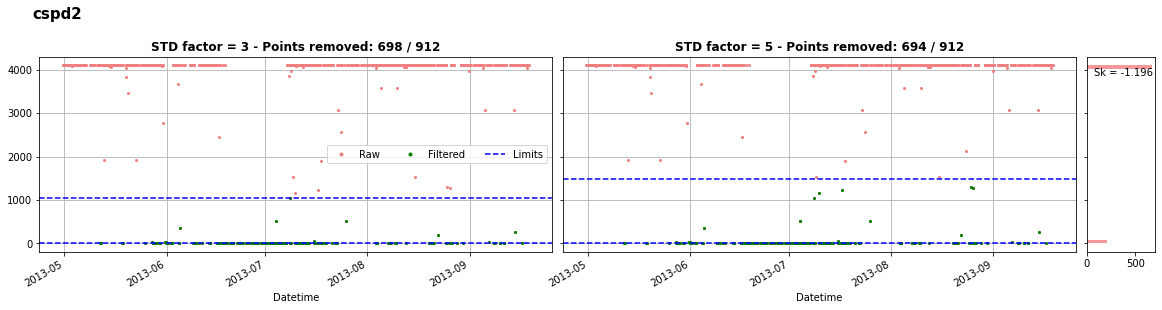

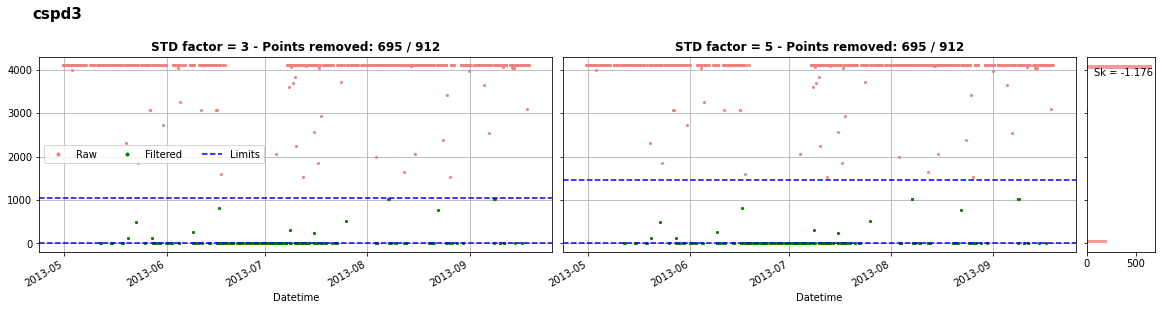

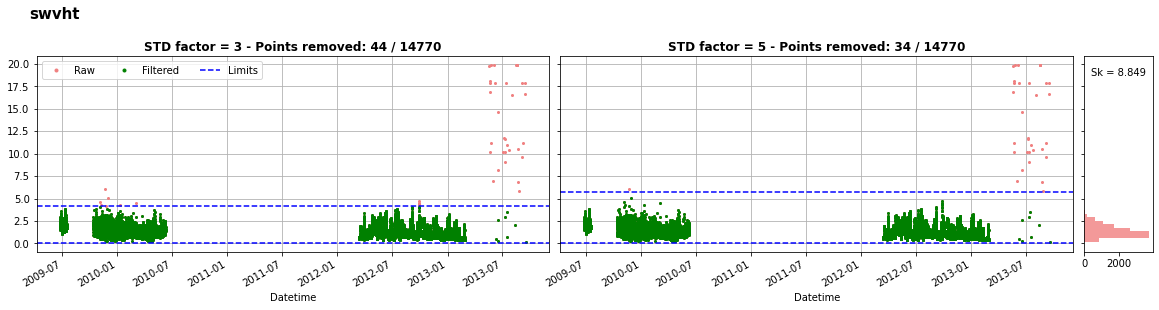

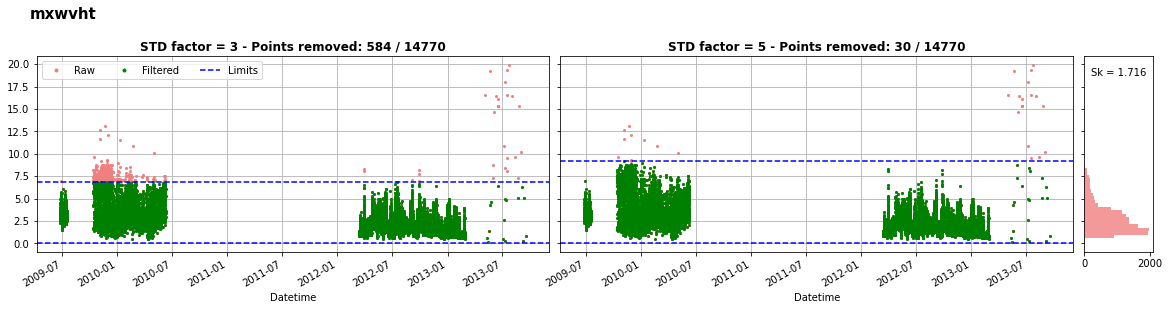

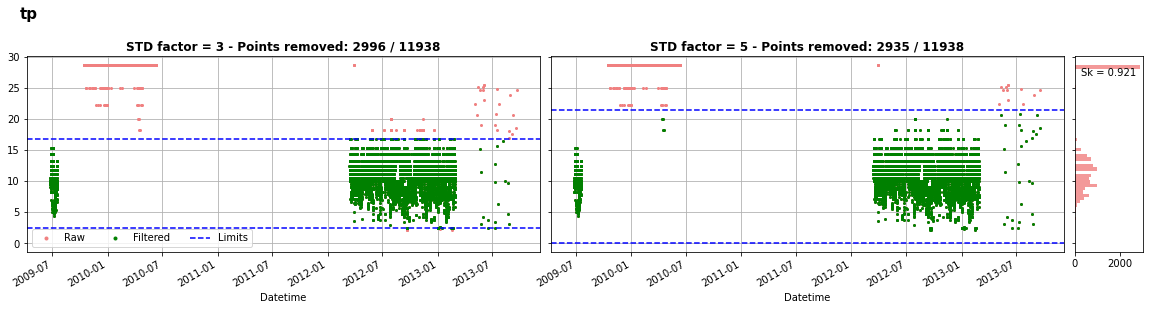

In [52]:
cabofrio_notdir = cabofrio.drop(columns=cabofrio.filter(regex='dir|head|spread').columns)
cabofrio_notdir = cabofrio_notdir.drop(columns=['wspd2','gust2'])
parameters = cabofrio_notdir.columns[1:]

manual_limits = [santos_out_lims_dict_3, santos_out_lims_dict_5]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=cabofrio,
                    limits=cabofrio_lims,
                    manual_limits=manual_limits,
                    buoy='cabofrio',
                    parameter=param)
    plt.show()